In [522]:
import pandas as pd
import numpy as np
from pybaseball import batting_stats
from pybaseball import salaries
import os

In [523]:
START = 2000
END = 2016

batting = batting_stats(START, END, qual=130)

In [524]:
batting.to_csv("batting.csv")

In [525]:
null = batting.isnull().sum()
complete_c = list(batting.columns[null == 0])
batting = batting[complete_c].copy()

In [526]:
batting = batting.sort_values(by=['Season'],ascending=True)
print(batting)

       IDfg  Season              Name   Team  Age    G   AB   PA    H   1B  \
1544   1032    2000          Ron Gant  - - -   35  123  425  487  106   58   
3293    217    2000     Jason Varitek    BOS   28  139  448  519  111   69   
1583   2024    2000        Andy Tracy    MON   26   83  192  218   50   30   
1356    293    2000      Fred McGriff    TBD   36  158  566  664  157  112   
3158    157    2000       Melvin Mora  - - -   28  132  414  464  114   79   
...     ...     ...               ...    ...  ...  ...  ...  ...  ...  ...   
3060   9847    2016  Andrew McCutchen    PIT   29  153  598  675  153  100   
239    5038    2016    Josh Donaldson    TOR   30  155  577  700  164   90   
2640  11615    2016     Brandon Drury    ARI   23  134  461  499  130   82   
2190   6364    2016    Danny Valencia    OAK   31  130  471  517  135   95   
3249   1551    2016        David Ross    CHC   39   67  166  205   38   22   

      2B  3B  HR    R  RBI   BB  IBB   SO  HBP  SF  SH  GDP  SB

In [527]:
SalariesCSV = pd.read_csv('contrib/Salaries.csv')
print(SalariesCSV)

       yearID teamID lgID   playerID    salary
0        1985    ATL   NL  barkele01    870000
1        1985    ATL   NL  bedrost01    550000
2        1985    ATL   NL  benedbr01    545000
3        1985    ATL   NL   campri01    633333
4        1985    ATL   NL  ceronri01    625000
...       ...    ...  ...        ...       ...
26423    2016    WAS   NL  strasst01  10400000
26424    2016    WAS   NL  taylomi02    524000
26425    2016    WAS   NL  treinbl01    524900
26426    2016    WAS   NL  werthja01  21733615
26427    2016    WAS   NL  zimmery01  14000000

[26428 rows x 5 columns]


In [528]:
SalariesCSV= SalariesCSV.drop(labels=range(0, 12264), axis=0)
# Drop command is used here to narrow focus down to the modern era, where the hypothesis begins, Why are player Salaries increasing, what is increasing them? What are the predictors of an increased salary?
print(SalariesCSV)

       yearID teamID lgID   playerID    salary
12264    2000    ANA   AL  belchti01   4600000
12265    2000    ANA   AL  botteke01   4000000
12266    2000    ANA   AL  clemeed02    215000
12267    2000    ANA   AL  colanmi01    200000
12268    2000    ANA   AL  davanje02    200000
...       ...    ...  ...        ...       ...
26423    2016    WAS   NL  strasst01  10400000
26424    2016    WAS   NL  taylomi02    524000
26425    2016    WAS   NL  treinbl01    524900
26426    2016    WAS   NL  werthja01  21733615
26427    2016    WAS   NL  zimmery01  14000000

[14164 rows x 5 columns]


In [529]:
#Now I'm going to create a new dataframe that will be trhe root for 3 combined dataframes.

In [530]:
FullName=pd.read_csv('core/People.csv')
pd.set_option('display.max_columns', None)
FullName['Name']= FullName['nameFirst']+' '+FullName['nameLast']
FullName=FullName[['playerID','Name']]
FullName

playerID             Name
0      aardsda01    David Aardsma
1      aaronha01       Hank Aaron
2      aaronto01     Tommie Aaron
3       aasedo01         Don Aase
4       abadan01        Andy Abad
...          ...              ...
20365   zupofr01       Frank Zupo
20366  zuvelpa01     Paul Zuvella
20367  zuverge01  George Zuverink
20368  zwilldu01   Dutch Zwilling
20369   zychto01        Tony Zych

[20370 rows x 2 columns]

In [531]:
experiment = pd.merge(FullName, SalariesCSV, on=['playerID'])

In [532]:
experiment

playerID           Name  yearID teamID lgID   salary
0      aardsda01  David Aardsma    2004    SFN   NL   300000
1      aardsda01  David Aardsma    2007    CHA   AL   387500
2      aardsda01  David Aardsma    2008    BOS   AL   403250
3      aardsda01  David Aardsma    2009    SEA   AL   419000
4      aardsda01  David Aardsma    2010    SEA   AL  2750000
...          ...            ...     ...    ...  ...      ...
14159  zumayjo01    Joel Zumaya    2010    DET   AL   915000
14160  zumayjo01    Joel Zumaya    2011    DET   AL  1400000
14161  zuninmi01    Mike Zunino    2014    SEA   AL   504100
14162  zuninmi01    Mike Zunino    2015    SEA   AL   523500
14163   zychto01      Tony Zych    2016    SEA   AL   511000

[14164 rows x 6 columns]

In [533]:
experiment.drop_duplicates(subset=['Name','yearID'], keep='first',inplace=True, ignore_index=True)

In [534]:
experiment.sort_values('playerID')


playerID           Name  yearID teamID lgID   salary
0      aardsda01  David Aardsma    2004    SFN   NL   300000
1      aardsda01  David Aardsma    2007    CHA   AL   387500
2      aardsda01  David Aardsma    2008    BOS   AL   403250
3      aardsda01  David Aardsma    2009    SEA   AL   419000
4      aardsda01  David Aardsma    2010    SEA   AL  2750000
...          ...            ...     ...    ...  ...      ...
14121  zumayjo01    Joel Zumaya    2010    DET   AL   915000
14122  zumayjo01    Joel Zumaya    2011    DET   AL  1400000
14124  zuninmi01    Mike Zunino    2015    SEA   AL   523500
14123  zuninmi01    Mike Zunino    2014    SEA   AL   504100
14125   zychto01      Tony Zych    2016    SEA   AL   511000

[14126 rows x 6 columns]

In [535]:
experiment[experiment['playerID'] == experiment['playerID'].iloc[0]].to_dict()

{'playerID': {0: 'aardsda01',
  1: 'aardsda01',
  2: 'aardsda01',
  3: 'aardsda01',
  4: 'aardsda01',
  5: 'aardsda01',
  6: 'aardsda01'},
 'Name': {0: 'David Aardsma',
  1: 'David Aardsma',
  2: 'David Aardsma',
  3: 'David Aardsma',
  4: 'David Aardsma',
  5: 'David Aardsma',
  6: 'David Aardsma'},
 'yearID': {0: 2004, 1: 2007, 2: 2008, 3: 2009, 4: 2010, 5: 2011, 6: 2012},
 'teamID': {0: 'SFN',
  1: 'CHA',
  2: 'BOS',
  3: 'SEA',
  4: 'SEA',
  5: 'SEA',
  6: 'NYA'},
 'lgID': {0: 'NL', 1: 'AL', 2: 'AL', 3: 'AL', 4: 'AL', 5: 'AL', 6: 'AL'},
 'salary': {0: 300000,
  1: 387500,
  2: 403250,
  3: 419000,
  4: 2750000,
  5: 4500000,
  6: 500000}}

In [536]:
batting[batting['Name'] == batting['Name'].iloc[0]].to_dict()

{'IDfg': {1544: 1032, 2185: 1032, 1512: 1032},
 'Season': {1544: 2000, 2185: 2001, 1512: 2002},
 'Name': {1544: 'Ron Gant', 2185: 'Ron Gant', 1512: 'Ron Gant'},
 'Team': {1544: '- - -', 2185: '- - -', 1512: 'SDP'},
 'Age': {1544: 35, 2185: 36, 1512: 37},
 'G': {1544: 123, 2185: 93, 1512: 102},
 'AB': {1544: 425, 2185: 252, 1512: 309},
 'PA': {1544: 487, 2185: 292, 1512: 353},
 'H': {1544: 106, 2185: 65, 1512: 81},
 '1B': {1544: 58, 2185: 39, 1512: 48},
 '2B': {1544: 19, 2185: 13, 1512: 14},
 '3B': {1544: 3, 2185: 3, 1512: 1},
 'HR': {1544: 26, 2185: 10, 1512: 18},
 'R': {1544: 69, 2185: 46, 1512: 58},
 'RBI': {1544: 54, 2185: 35, 1512: 59},
 'BB': {1544: 56, 2185: 35, 1512: 36},
 'IBB': {1544: 1, 2185: 2, 1512: 1},
 'SO': {1544: 91, 2185: 80, 1512: 59},
 'HBP': {1544: 1, 2185: 0, 1512: 2},
 'SF': {1544: 4, 2185: 3, 1512: 5},
 'SH': {1544: 1, 2185: 2, 1512: 1},
 'GDP': {1544: 7, 2185: 0, 1512: 8},
 'SB': {1544: 6, 2185: 5, 1512: 4},
 'CS': {1544: 6, 2185: 1, 1512: 6},
 'AVG': {1544: 0.2

In [537]:
batting[batting['Name'] == experiment['playerID'].iloc[0]].to_dict()

{'IDfg': {},
 'Season': {},
 'Name': {},
 'Team': {},
 'Age': {},
 'G': {},
 'AB': {},
 'PA': {},
 'H': {},
 '1B': {},
 '2B': {},
 '3B': {},
 'HR': {},
 'R': {},
 'RBI': {},
 'BB': {},
 'IBB': {},
 'SO': {},
 'HBP': {},
 'SF': {},
 'SH': {},
 'GDP': {},
 'SB': {},
 'CS': {},
 'AVG': {},
 'BB%': {},
 'K%': {},
 'BB/K': {},
 'OBP': {},
 'SLG': {},
 'OPS': {},
 'ISO': {},
 'BABIP': {},
 'wOBA': {},
 'wRAA': {},
 'wRC': {},
 'Bat': {},
 'Rep': {},
 'Pos': {},
 'RAR': {},
 'WAR': {},
 'Spd': {},
 'wRC+': {},
 'WPA': {},
 '-WPA': {},
 '+WPA': {},
 'RE24': {},
 'REW': {},
 'pLI': {},
 'PH': {},
 'WPA/LI': {},
 'Clutch': {},
 'BsR': {},
 'Def': {},
 'wSB': {},
 'Age Rng': {},
 'Off': {},
 'Lg': {},
 'TTO%': {},
 'AVG+': {},
 'BB%+': {},
 'K%+': {},
 'OBP+': {},
 'SLG+': {},
 'ISO+': {},
 'BABIP+': {},
 'Events': {},
 'L-WAR': {}}

In [538]:
batting[batting['Name'] == "David Aardsma"].to_dict()


{'IDfg': {},
 'Season': {},
 'Name': {},
 'Team': {},
 'Age': {},
 'G': {},
 'AB': {},
 'PA': {},
 'H': {},
 '1B': {},
 '2B': {},
 '3B': {},
 'HR': {},
 'R': {},
 'RBI': {},
 'BB': {},
 'IBB': {},
 'SO': {},
 'HBP': {},
 'SF': {},
 'SH': {},
 'GDP': {},
 'SB': {},
 'CS': {},
 'AVG': {},
 'BB%': {},
 'K%': {},
 'BB/K': {},
 'OBP': {},
 'SLG': {},
 'OPS': {},
 'ISO': {},
 'BABIP': {},
 'wOBA': {},
 'wRAA': {},
 'wRC': {},
 'Bat': {},
 'Rep': {},
 'Pos': {},
 'RAR': {},
 'WAR': {},
 'Spd': {},
 'wRC+': {},
 'WPA': {},
 '-WPA': {},
 '+WPA': {},
 'RE24': {},
 'REW': {},
 'pLI': {},
 'PH': {},
 'WPA/LI': {},
 'Clutch': {},
 'BsR': {},
 'Def': {},
 'wSB': {},
 'Age Rng': {},
 'Off': {},
 'Lg': {},
 'TTO%': {},
 'AVG+': {},
 'BB%+': {},
 'K%+': {},
 'OBP+': {},
 'SLG+': {},
 'ISO+': {},
 'BABIP+': {},
 'Events': {},
 'L-WAR': {}}

In [539]:
experiment[experiment['Name'] == "Damian Jackson"].to_dict()

{'playerID': {6141: 'jacksda04',
  6142: 'jacksda04',
  6143: 'jacksda04',
  6144: 'jacksda04',
  6145: 'jacksda04'},
 'Name': {6141: 'Damian Jackson',
  6142: 'Damian Jackson',
  6143: 'Damian Jackson',
  6144: 'Damian Jackson',
  6145: 'Damian Jackson'},
 'yearID': {6141: 2000, 6142: 2001, 6143: 2002, 6144: 2003, 6145: 2006},
 'teamID': {6141: 'SDN', 6142: 'SDN', 6143: 'DET', 6144: 'BOS', 6145: 'WAS'},
 'lgID': {6141: 'NL', 6142: 'NL', 6143: 'AL', 6144: 'AL', 6145: 'NL'},
 'salary': {6141: 250000,
  6142: 350000,
  6143: 625000,
  6144: 625000,
  6145: 700000}}

In [540]:
experiment[experiment.duplicated(subset=['Name', 'yearID'], keep=False)]

Empty DataFrame
Columns: [playerID, Name, yearID, teamID, lgID, salary]
Index: []

In [541]:
batting[batting.duplicated(subset=['Name', 'Season'], keep=False)]

IDfg  Season           Name   Team  Age    G   AB   PA    H   1B  2B  \
4867      562    2000   Brian Hunter  - - -   29  104  240  274   64   57   5   
3950      281    2000  Alex Gonzalez    TOR   27  141  527  591  133   85  31   
6819      520    2000  Alex Gonzalez    FLA   23  109  385  407   77   49  17   
3668  1006197    2000   Brian Hunter  - - -   32   87  140  160   30   17   5   
2011     1376    2001   Mark Johnson    NYM   33   71  118  136   30   17   6   
5322      520    2001  Alex Gonzalez    FLA   24  145  515  561  129   83  36   
3862      240    2001   Mark Johnson    CHW   25   61  173  211   43   31   6   
4962      281    2001  Alex Gonzalez    TOR   28  154  636  703  161  114  25   
6039      520    2002  Alex Gonzalez    FLA   25   42  151  172   34   24   7   
3852      281    2002  Alex Gonzalez    CHC   29  142  513  568  127   77  27   
4606      281    2003  Alex Gonzalez    CHC   30  152  536  601  122   65  37   
3806      520    2003  Alex Gonzalez    FLA   26  150  528  582  135   78  33   
6473     1420    2004  Abraham Nunez    PIT   28  112  182  195   43   32   9   
2100     1860    2004  Luis Gonzalez    COL   25  102  322  351   94   63  17   
6139      281    2004  Alex Gonzalez  - - -   31   83  285  304   64   38  18   
5579      520    2004  Alex Gonzalez    FLA   27  159  561  599  130   74  30   
6028      531    2004  Abraham Nunez  - - -   27  117  285  322   61   44  10   
1050       55    2004  Luis Gonzalez    ARI   36  105  379  451   98   48  28   
5199      520    2005  Alex Gonzalez    FLA   28  130  435  478  115   80  30   
1471       55    2005  Luis Gonzalez    ARI   37  155  579  672  157   96  37   
3663      281    2005  Alex Gonzalez    TBD   32  109  349  383   94   64  20   
2996     1860    2005  Luis Gonzalez    COL   26  128  404  442  118   84  25   
2245       55    2006  Luis Gonzalez    ARI   38  153  586  668  159   90  52   
6239     1860    2006  Luis Gonzalez    COL   27   61  149  158   36   24   9   

      3B  HR   R  RBI  BB  IBB   SO  HBP  SF  SH  GDP  SB  CS    AVG    BB%  \
4867   1   1  47   14  27    0   40    1   1   5    2  20   3  0.267  0.099   
3950   2  15  68   69  43    0  113    4   1  16   14   4   4  0.252  0.073   
6819   4   7  35   42  13    0   77    2   2   5    7   7   1  0.200  0.032   
3668   0   8  14   23  20    1   39    0   0   0    2   0   1  0.214  0.125   
2011   1   6  17   23  16    1   31    0   2   0    0   0   2  0.254  0.118   
5322   1   9  57   48  30    6  107   10   3   3   13   2   2  0.250  0.053   
3862   1   5  21   18  23    1   31    2   3  10    5   2   1  0.249  0.109   
4962   5  17  79   76  43    0  149    7  10   7   16  18  11  0.253  0.061   
6039   1   2  15   18  12    1   32    4   2   3    2   3   1  0.225  0.070   
3852   5  18  58   61  46    7  136    3   2   4   11   5   3  0.248  0.081   
4606   0  20  71   59  47    1  123    6   4   8   17   3   3  0.228  0.078   
3806   6  18  52   77  33   13  106   13   5   3    8   0   4  0.256  0.057   
6473   0   2  17   13  10    0   36    0   1   2    8   1   3  0.236  0.051   
2100   2  12  42   40  15    1   67    4   1   9    5   1   5  0.292  0.043   
6139   1   7  36   27  14    0   64    1   0   4    7   2   2  0.225  0.046   
5579   3  23  67   79  27    9  126    4   4   3   17   3   1  0.232  0.045   
6028   1   6  40   34  34    1   69    0   1   2    7   1   3  0.214  0.106   
1050   5  17  69   48  68   11   58    2   2   0    9   2   2  0.259  0.151   
5199   0   5  45   45  31   10   81    5   3   4   11   5   3  0.264  0.065   
1471   0  24  90   79  78   12   90   11   4   0   14   4   1  0.271  0.116   
3663   1   9  47   38  26    1   74    3   3   2   13   2   1  0.269  0.068   
2996   0   9  51   44  20    0   63    6   3   8    7   3   4  0.292  0.045   
2245   2  15  93   73  69   10   58    7   6   0   14   0   1  0.271  0.103   
6239   1   2   7   14   4    0   27    2   1   2    3   1   1  0.242  0.025   

       

In [542]:
batting= batting.dropna()

In [543]:
batting['Team']= batting['Team'].replace('- - -', np.nan)

In [544]:
batting

IDfg  Season              Name Team  Age    G   AB   PA    H   1B  2B  \
1544   1032    2000          Ron Gant  NaN   35  123  425  487  106   58  19   
3293    217    2000     Jason Varitek  BOS   28  139  448  519  111   69  31   
1583   2024    2000        Andy Tracy  MON   26   83  192  218   50   30   8   
1356    293    2000      Fred McGriff  TBD   36  158  566  664  157  112  18   
3158    157    2000       Melvin Mora  NaN   28  132  414  464  114   79  22   
...     ...     ...               ...  ...  ...  ...  ...  ...  ...  ...  ..   
3060   9847    2016  Andrew McCutchen  PIT   29  153  598  675  153  100  26   
239    5038    2016    Josh Donaldson  TOR   30  155  577  700  164   90  32   
2640  11615    2016     Brandon Drury  ARI   23  134  461  499  130   82  31   
2190   6364    2016    Danny Valencia  OAK   31  130  471  517  135   95  22   
3249   1551    2016        David Ross  CHC   39   67  166  205   38   22   6   

      3B  HR    R  RBI   BB  IBB   SO  HBP  SF  SH  GDP  SB  CS    AVG    BB%  \
1544   3  26   69   54   56    1   91    1   4   1    7   6   6  0.249  0.115   
3293   1  10   55   65   60    3   84    6   4   1   16   1   1  0.248  0.116   
1583   1  11   29   32   22    1   61    2   2   0    3   1   0  0.260  0.101   
1356   0  27   82  106   91   10  120    0   7   0   16   2   0  0.277  0.137   
3158   5   8   60   47   35    3   80    6   5   4    5  12  11  0.275  0.075   
...   ..  ..  ...  ...  ...  ...  ...  ...  ..  ..  ...  ..  ..    ...    ...   
3060   3  24   81   79   69    7  143    5   3   0   15   6   7  0.256  0.102   
239    5  37  122   99  109    6  119    9   3   2   16   7   1  0.284  0.156   
2640   1  16   59   53   31    2  100    3   4   0   14   1   1  0.282  0.062   
2190   1  17   72   51   41    1  115    3   2   0   11   1   1  0.287  0.079   
3249   0  10   24   32   30    6   54    0   5   4    3   0   1  0.229  0.146   

         K%  BB/K    OBP    SLG    OPS    ISO  BABIP   wOBA  wRAA  wRC   Bat  \
1544  0.187  0.62  0.335  0.492  0.827  0.242  0.256  0.354   5.6   69   3.3   
3293  0.162  0.71  0.342  0.388  0.730  0.141  0.282  0.325  -7.1   61  -9.9   
1583  0.280  0.36  0.339  0.484  0.824  0.224  0.320  0.353   2.3   31   1.3   
1356  0.181  0.76  0.373  0.452  0.826  0.175  0.305  0.358  10.1   97   6.6   
3158  0.172  0.44  0.337  0.411  0.748  0.135  0.320  0.327  -5.6   55  -5.3   
...     ...   ...    ...    ...    ...    ...    ...    ...   ...  ...   ...   
3060  0.212  0.48  0.336  0.430  0.766  0.174  0.297  0.329   5.9   85   4.0   
239   0.170  0.92  0.404  0.549  0.953  0.265  0.300  0.403  49.0  131  47.6   
2640  0.200  0.31  0.329  0.458  0.786  0.176  0.327  0.335   7.0   66   1.3   
2190  0.222  0.36  0.346  0.446  0.792  0.159  0.346  0.342  10.1   71  10.4   
3249  0.263  0.56  0.338  0.446  0.784  0.217  0.262  0.326   1.3   25   0.2   

       Rep   Pos   RAR  WAR  Spd  wRC+   WPA   -WPA   +WPA   RE24   REW   pLI  \
1544  15.7  -5.7  22.8  2.2  4.1   105 -1.22  -9.77   8.55 -12.50 -1.09  1.06   
3293  16.8   9.1  16.7  1.5  2.3    86 -2.28 -10.65   8.37  -7.97 -0.76  1.06   
1583   7.0  -1.1   1.8  0.1  3.9   104 -0.13  -3.78   3.64   2.26  0.22  1.00   
1356  21.5 -11.8   2.2  0.1  2.0   107  1.91 -11.94  13.85  18.76  1.70  1.09   
3158  15.0   4.1   9.4  0.8  5.6    92 -0.96  -8.49   7.53  -1.92 -0.12  0.98   
...    ...   ...   ...  ...  ...   ...   ...    ...    ...    ...   ...   ...   
3060  20.4   2.3  11.0  1.1  3.4   105  0.28 -11.60  11.88   8.90  0.85  0.96   
239   21.1   0.0  67.9  6.9  5.1   157  4.36 -10.66  15.02  48.22  4.85  1.00   
2640  15.1  -3.1  -0.5  0.0  2.4   102 -0.21  -9.17   8.95  -3.95 -0.44  0.98   
2190  15.6  -2.3  16.2  1.7  2.7   117  0.28  -9.01   9.29   9.87  0.95  0.96   
3249   6.2   3.8  18.3  1.9  1.4   101  0.06  -3.36   3.42   1.54  0.15  0.98   

      PH  WPA/LI  Clutch  BsR   Def  wSB  Age Rng   Off   Lg   TTO%  AVG+  \
1544  13    0.71   -1.85 -1.5   4.3 -1.5  35 - 35   1.8  0.9  

In [545]:
batting= batting.dropna()

In [546]:
batting

IDfg  Season              Name Team  Age    G   AB   PA    H   1B  2B  \
3293    217    2000     Jason Varitek  BOS   28  139  448  519  111   69  31   
1583   2024    2000        Andy Tracy  MON   26   83  192  218   50   30   8   
1356    293    2000      Fred McGriff  TBD   36  158  566  664  157  112  18   
2641   1383    2000      Mark Loretta  MIL   28   91  352  399   99   70  21   
5527    766    2000   Orlando Cabrera  MON   25  125  422  454  100   61  25   
...     ...     ...               ...  ...  ...  ...  ...  ...  ...  ...  ..   
3060   9847    2016  Andrew McCutchen  PIT   29  153  598  675  153  100  26   
239    5038    2016    Josh Donaldson  TOR   30  155  577  700  164   90  32   
2640  11615    2016     Brandon Drury  ARI   23  134  461  499  130   82  31   
2190   6364    2016    Danny Valencia  OAK   31  130  471  517  135   95  22   
3249   1551    2016        David Ross  CHC   39   67  166  205   38   22   6   

      3B  HR    R  RBI   BB  IBB   SO  HBP  SF  SH  GDP  SB  CS    AVG    BB%  \
3293   1  10   55   65   60    3   84    6   4   1   16   1   1  0.248  0.116   
1583   1  11   29   32   22    1   61    2   2   0    3   1   0  0.260  0.101   
1356   0  27   82  106   91   10  120    0   7   0   16   2   0  0.277  0.137   
2641   1   7   49   40   37    2   38    1   1   8    9   0   3  0.281  0.093   
5527   1  13   47   55   25    3   28    1   3   3   12   4   4  0.237  0.055   
...   ..  ..  ...  ...  ...  ...  ...  ...  ..  ..  ...  ..  ..    ...    ...   
3060   3  24   81   79   69    7  143    5   3   0   15   6   7  0.256  0.102   
239    5  37  122   99  109    6  119    9   3   2   16   7   1  0.284  0.156   
2640   1  16   59   53   31    2  100    3   4   0   14   1   1  0.282  0.062   
2190   1  17   72   51   41    1  115    3   2   0   11   1   1  0.287  0.079   
3249   0  10   24   32   30    6   54    0   5   4    3   0   1  0.229  0.146   

         K%  BB/K    OBP    SLG    OPS    ISO  BABIP   wOBA  wRAA  wRC   Bat  \
3293  0.162  0.71  0.342  0.388  0.730  0.141  0.282  0.325  -7.1   61  -9.9   
1583  0.280  0.36  0.339  0.484  0.824  0.224  0.320  0.353   2.3   31   1.3   
1356  0.181  0.76  0.373  0.452  0.826  0.175  0.305  0.358  10.1   97   6.6   
2641  0.095  0.97  0.350  0.406  0.757  0.125  0.299  0.335  -2.0   50  -3.8   
5527  0.062  0.89  0.279  0.393  0.673  0.156  0.227  0.289 -20.4   39 -22.6   
...     ...   ...    ...    ...    ...    ...    ...    ...   ...  ...   ...   
3060  0.212  0.48  0.336  0.430  0.766  0.174  0.297  0.329   5.9   85   4.0   
239   0.170  0.92  0.404  0.549  0.953  0.265  0.300  0.403  49.0  131  47.6   
2640  0.200  0.31  0.329  0.458  0.786  0.176  0.327  0.335   7.0   66   1.3   
2190  0.222  0.36  0.346  0.446  0.792  0.159  0.346  0.342  10.1   71  10.4   
3249  0.263  0.56  0.338  0.446  0.784  0.217  0.262  0.326   1.3   25   0.2   

       Rep   Pos   RAR  WAR  Spd  wRC+   WPA   -WPA   +WPA   RE24   REW   pLI  \
3293  16.8   9.1  16.7  1.5  2.3    86 -2.28 -10.65   8.37  -7.97 -0.76  1.06   
1583   7.0  -1.1   1.8  0.1  3.9   104 -0.13  -3.78   3.64   2.26  0.22  1.00   
1356  21.5 -11.8   2.2  0.1  2.0   107  1.91 -11.94  13.85  18.76  1.70  1.09   
2641  12.9   3.9  16.2  1.5  2.5    93  0.93  -6.19   7.11   8.05  0.82  0.95   
5527  14.7   5.1  -4.2 -0.4  3.2    63 -1.33  -8.61   7.28 -11.57 -1.03  0.95   
...    ...   ...   ...  ...  ...   ...   ...    ...    ...    ...   ...   ...   
3060  20.4   2.3  11.0  1.1  3.4   105  0.28 -11.60  11.88   8.90  0.85  0.96   
239   21.1   0.0  67.9  6.9  5.1   157  4.36 -10.66  15.02  48.22  4.85  1.00   
2640  15.1  -3.1  -0.5  0.0  2.4   102 -0.21  -9.17   8.95  -3.95 -0.44  0.98   
2190  15.6  -2.3  16.2  1.7  2.7   117  0.28  -9.01   9.29   9.87  0.95  0.96   
3249   6.2   3.8  18.3  1.9  1.4   101  0.06  -3.36   3.42   1.54  0.15  0.98   

      PH  WPA/LI  Clutch  BsR   Def  wSB  Age Rng   Off   Lg   TTO%  AVG+  \
3293  18   -0.63   -1.52 -0.2   8.1 -0.2  28 - 28 -10.1  1.9  

In [547]:
experiment.teamID.unique()

array(['SFN', 'CHA', 'BOS', 'SEA', 'NYA', 'CIN', 'HOU', 'OAK', 'MIN',
       'FLO', 'NYN', 'ATL', 'TBA', 'PHI', 'LAA', 'LAN', 'ARI', 'TOR',
       'BAL', 'MIL', 'DET', 'COL', 'CLE', 'SLN', 'SDN', 'TEX', 'KCA',
       'CHN', 'MIA', 'PIT', 'ANA', 'WAS', 'MON'], dtype=object)

In [548]:
batting.Team.unique()

array(['BOS', 'MON', 'TBD', 'MIL', 'NYY', 'CIN', 'HOU', 'DET', 'LAD',
       'PHI', 'STL', 'MIN', 'TOR', 'COL', 'CHW', 'OAK', 'PIT', 'CLE',
       'FLA', 'SEA', 'NYM', 'ARI', 'TEX', 'SDP', 'CHC', 'KCR', 'ANA',
       'ATL', 'SFG', 'BAL', 'LAA', 'WSN', 'TBR', 'MIA'], dtype=object)

In [549]:
experiment['teamID'] = experiment['teamID'].replace(['CHA', 'NYA', 'FLO', 'NYN',
     'TBA', 'LAA', 'LAN', 'SFN', 'SLN', 'SDN', 'KCA',
       'CHN', 'WAS'], ['CHW', 'NYY', 'MIA', 'NYM', 'TBR', 'ANA', 'LAD', 'SFG', 'STL', 'SDP', 'KCR', 'CHC', 'WSN'])

In [550]:
experiment.teamID.unique()

array(['SFG', 'CHW', 'BOS', 'SEA', 'NYY', 'CIN', 'HOU', 'OAK', 'MIN',
       'MIA', 'NYM', 'ATL', 'TBR', 'PHI', 'ANA', 'LAD', 'ARI', 'TOR',
       'BAL', 'MIL', 'DET', 'COL', 'CLE', 'STL', 'SDP', 'TEX', 'KCR',
       'CHC', 'PIT', 'WSN', 'MON'], dtype=object)

In [551]:
experiment[experiment.duplicated(subset=['Name', 'yearID'], keep=False)].drop 

<bound method DataFrame.drop of Empty DataFrame
Columns: [playerID, Name, yearID, teamID, lgID, salary]
Index: []>

In [552]:
experiment[experiment.duplicated(subset=['Name', 'yearID', 'teamID'], keep=False)]

Empty DataFrame
Columns: [playerID, Name, yearID, teamID, lgID, salary]
Index: []

In [553]:
experiment

playerID           Name  yearID teamID lgID   salary
0      aardsda01  David Aardsma    2004    SFG   NL   300000
1      aardsda01  David Aardsma    2007    CHW   AL   387500
2      aardsda01  David Aardsma    2008    BOS   AL   403250
3      aardsda01  David Aardsma    2009    SEA   AL   419000
4      aardsda01  David Aardsma    2010    SEA   AL  2750000
...          ...            ...     ...    ...  ...      ...
14121  zumayjo01    Joel Zumaya    2010    DET   AL   915000
14122  zumayjo01    Joel Zumaya    2011    DET   AL  1400000
14123  zuninmi01    Mike Zunino    2014    SEA   AL   504100
14124  zuninmi01    Mike Zunino    2015    SEA   AL   523500
14125   zychto01      Tony Zych    2016    SEA   AL   511000

[14126 rows x 6 columns]

In [554]:
experiment[experiment.duplicated(subset=['Name', 'yearID', 'teamID'], keep=False)]

Empty DataFrame
Columns: [playerID, Name, yearID, teamID, lgID, salary]
Index: []

In [555]:
dfNew = experiment.merge(batting, left_on=['Name', 'yearID', 'teamID'], right_on=['Name', 'Season', 'Team'], validate='1:1') 

In [556]:
dfNew

playerID         Name  yearID teamID lgID    salary     IDfg  Season  \
0     abbotje01  Jeff Abbott    2000    CHW   AL    255000  1000011    2000   
1     abbotku01  Kurt Abbott    2000    NYM   NL    500000  1000013    2000   
2     abreubo01  Bobby Abreu    2000    PHI   NL   2933333      945    2000   
3     abreubo01  Bobby Abreu    2001    PHI   NL   4983000      945    2001   
4     abreubo01  Bobby Abreu    2002    PHI   NL   6333333      945    2002   
...         ...          ...     ...    ...  ...       ...      ...     ...   
4934  zobribe01  Ben Zobrist    2013    TBR   AL   5687300     7435    2013   
4935  zobribe01  Ben Zobrist    2014    TBR   AL   7000000     7435    2014   
4936  zobribe01  Ben Zobrist    2016    CHC   NL  10500000     7435    2016   
4937  zuninmi01  Mike Zunino    2014    SEA   AL    504100    13265    2014   
4938  zuninmi01  Mike Zunino    2015    SEA   AL    523500    13265    2015   

     Team  Age    G   AB   PA    H   1B  2B  3B  HR    R  RBI   BB  IBB   SO  \
0     CHW   27   80  215  242   59   40  15   1   3   31   29   21    1   38   
1     NYM   31   79  157  173   34   20   7   1   6   22   12   14    2   51   
2     PHI   26  154  576  680  182  105  42  10  25  103   79  100    9  116   
3     PHI   27  162  588  704  170   87  48   4  31  118  110  106   11  137   
4     PHI   28  157  572  685  176  100  50   6  20  102   85  104    9  117   
...   ...  ...  ...  ...  ...  ...  ...  ..  ..  ..  ...  ...  ...  ...  ...   
4934  TBR   32  157  612  698  168  117  36   3  12   77   71   72    4   91   
4935  TBR   33  146  570  654  155  108  34   3  10   83   52   75    4   84   
4936  CHC   35  147  523  631  142   90  31   3  18   94   76   96    6   82   
4937  SEA   23  131  438  476   87   43  20   2  22   51   60   17    1  158   
4938  SEA   24  112  350  386   61   39  11   0  11   28   28   21    0  132   

      HBP  SF  SH  GDP  SB  CS    AVG    BB%     K%  BB/K    OBP    SLG  \
0       2   1   2    2   2   1  0.274  0.087  0.157  0.55  0.343  0.395   
1       1   1   0    2   1   1  0.217  0.081  0.295  0.27  0.283  0.389   
2       1   3   0   12  28   8  0.316  0.147  0.171  0.86  0.416  0.554   
3       1   9   0   13  36  14  0.289  0.151  0.195  0.77  0.393  0.543   
4       3   6   0   11  31  12  0.308  0.152  0.171  0.89  0.413  0.521   
...   ...  ..  ..  ...  ..  ..    ...    ...    ...   ...    ...    ...   
4934    7   6   1   18  11   3  0.275  0.103  0.130  0.79  0.354  0.402   
4935    1   6   2    8  10   5  0.272  0.115  0.128  0.89  0.354  0.395   
4936    4   4   4   17   6   4  0.272  0.152  0.130  1.17  0.386  0.446   
4937   17   4   0   13   0   3  0.199  0.036  0.332  0.11  0.254  0.404   
4938    5   2   8    6   0   1  0.174  0.054  0.342  0.16  0.230  0.300   

        OPS    ISO  BABIP   wOBA  wRAA  wRC   Bat   Rep  Pos   RAR  WAR  Spd  \
0     0.738  0.121  0.320  0.328  -2.7   29  -4.2   7.8 -1.6  -2.1 -0.2  3.9   
1     0.672  0.172  0.277  0.289  -7.8   15  -7.7   5.6  1.5  -2.6 -0.3  4.2   
2     0.970  0.238  0.358  0.413  43.1  132  40.0  22.0 -6.8  73.2  6.9  6.8   
3     0.936  0.253  0.324  0.393  39.0  126  36.1  22.0 -7.3  54.0  5.3  6.1   
4     0.934  0.213  0.354  0.401  42.4  125  40.7  20.9 -6.1  52.0  5.2  6.1   
...     ...    ...    ...    ...   ...  ...   ...   ...  ...   ...  ...  ...   
4934  0.756  0.127  0.303  0.334  11.2   88  11.1  19.9  0.9  39.0  4.2  4.4   
4935  0.749  0.123  0.301  0.333  11.6   82  12.0  18.5 -0.1  42.8  4.7  4.4   
4936  0.831  0.174  0.290  0.360  21.8   96  18.7  19.0  0.2  32.6  3.3  4.0   
4937  0.658  0.205  0.248  0.290  -7.4   44  -6.7  13.4  9.5  34.6  3.8  3.4   
4938  0.530  0.126  0.239  0.235 -24.1   19 -23.7  11.3  7.9   6.9  0.7  1.3   

      wRC+   WPA   -WPA   +WPA   RE24   REW   pLI  PH  WPA/LI  Clutch  BsR  \
0       87  0.37  -3.89   4.26  -6.74 -0.57  0.90  14   -0.16    0.57  0.0   
1       67 -0.40  -3.05   2.65 -12.42 -1.20  0.95  16   -0.88    0.46 -0.2   
2

In [557]:
GroupByYear = dfNew.groupby('yearID')
counts = GroupByYear.count()
average_player_salary = GroupByYear.sum()['salary'] / GroupByYear.count()['salary']
average_player_salarydf= average_player_salary.reset_index()
average_player_salarydf.columns = ['yearID', 'Average Annual Player Salary']
dfNew = pd.merge(dfNew, average_player_salarydf, on='yearID')

dfNew['Year Adjusted Salary'] = dfNew['salary'] / dfNew['Average Annual Player Salary']

C:\Users\Evan\AppData\Local\Temp\ipykernel_35004\1267245013.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_player_salary = GroupByYear.sum()['salary'] / GroupByYear.count()['salary']


In [558]:
dfNew

playerID             Name  yearID teamID lgID    salary     IDfg  \
0     abbotje01      Jeff Abbott    2000    CHW   AL    255000  1000011   
1     abbotku01      Kurt Abbott    2000    NYM   NL    500000  1000013   
2     abreubo01      Bobby Abreu    2000    PHI   NL   2933333      945   
3     agbaybe01   Benny Agbayani    2000    NYM   NL    220000      416   
4     alexama02  Manny Alexander    2000    BOS   AL    612500     1954   
...         ...              ...     ...    ...  ...       ...      ...   
4934  youklke01   Kevin Youkilis    2009    BOS   AL   6250000     1935   
4935  youngde03     Delmon Young    2009    MIN   AL   1152000     2140   
4936  youngmi02    Michael Young    2009    TEX   AL  13054526     1286   
4937  zimmery01   Ryan Zimmerman    2009    WSN   NL   3325000     4220   
4938  zobribe01      Ben Zobrist    2009    TBR   AL    415900     7435   

      Season Team  Age    G   AB   PA    H   1B  2B  3B  HR    R  RBI   BB  \
0       2000  CHW   27   80  215  242   59   40  15   1   3   31   29   21   
1       2000  NYM   31   79  157  173   34   20   7   1   6   22   12   14   
2       2000  PHI   26  154  576  680  182  105  42  10  25  103   79  100   
3       2000  NYM   28  119  350  415  101   66  19   1  15   59   60   54   
4       2000  BOS   29  101  194  209   41   30   4   3   4   30   19   13   
...      ...  ...  ...  ...  ...  ...  ...  ...  ..  ..  ..  ...  ...  ...   
4934    2009  BOS   30  136  491  588  150   86  36   1  27   99   94   77   
4935    2009  MIN   23  108  395  416  112   82  16   2  12   50   60   12   
4936    2009  TEX   32  135  541  593  174  114  36   2  22   76   68   47   
4937    2009  WSN   24  157  610  694  178  105  37   3  33  110  106   72   
4938    2009  TBR   28  152  501  599  149   87  28   7  27   91   91   91   

      IBB   SO  HBP  SF  SH  GDP  SB  CS    AVG    BB%     K%  BB/K    OBP  \
0       1   38    2   1   2    2   2   1  0.274  0.087  0.157  0.55  0.343   
1       2   51    1   1   0    2   1   1  0.217  0.081  0.295  0.27  0.283   
2       9  116    1   3   0   12  28   8  0.316  0.147  0.171  0.86  0.416   
3       2   68    7   3   0    6   5   5  0.289  0.130  0.164  0.79  0.391   
4       0   41    0   0   2    0   2   0  0.211  0.062  0.196  0.32  0.261   
...   ...  ...  ...  ..  ..  ...  ..  ..    ...    ...    ...   ...    ...   
4934    6  125   16   4   0    9   7   2  0.305  0.131  0.213  0.62  0.413   
4935    1   92    4   5   0   17   2   5  0.284  0.029  0.221  0.13  0.308   
4936    2   90    1   4   0   16   8   3  0.322  0.079  0.152  0.52  0.374   
4937    9  119    2   9   0   22   2   0  0.292  0.104  0.171  0.61  0.364   
4938    4  104    2   4   1    7  17   6  0.297  0.152  0.174  0.88  0.405   

        SLG    OPS    ISO  BABIP   wOBA  wRAA  wRC   Bat   Rep  Pos   RAR  \
0     0.395  0.738  0.121  0.320  0.328  -2.7   29  -4.2   7.8 -1.6  -2.1   
1     0.389  0.672  0.172  0.277  0.289  -7.8   15  -7.7   5.6  1.5  -2.6   
2     0.554  0.970  0.238  0.358  0.413  43.1  132  40.0  22.0 -6.8  73.2   
3     0.477  0.868  0.189  0.319  0.380  14.3   69  14.7  13.4 -4.0  22.5   
4     0.325  0.586  0.113  0.248  0.260 -14.7   13 -15.8   6.8  0.9  -8.0   
...     ...    ...    ...    ...    ...   ...  ...   ...   ...  ...   ...   
4934  0.548  0.961  0.242  0.359  0.413  41.0  112  34.7  17.9 -4.8  59.2   
4935  0.425  0.733  0.142  0.338  0.317  -3.9   46  -5.2  12.7 -5.0 -13.0   
4936  0.518  0.892  0.196  0.351  0.385  27.6   99  20.8  18.1  1.9  26.4   
4937  0.525  0.888  0.233  0.310  0.377  27.9  111  25.7  21.1  2.2  65.5   
4938  0.543  0.948  0.246  0.326  0.407  38.8  111  39.0  18.2 -0.5  87.0   

      WAR  Spd  wRC+   WPA   -WPA   +WPA   RE24   REW   pLI  PH  WPA/LI  \
0    -0.2  3.9    87  0.37  -3.89   4.26  -6.74 -0.57  0.90  14   -0.16   
1    -0.3  4.2    67 -0.40  -3.05   2.65 -12.42 -1.20  0.95  16   -0.88   
2     6.9  6.8   143  4.76 -10.29  15.05  40.92  3.98  1.02   3    3.44   
3     2

In [559]:
dfNew['Team WAR'] = dfNew.groupby(['teamID', 'yearID'])['WAR'].transform('sum')
# This stat will give us an indicator of how well a teams offensive did using the WAR stat, presumably in arbitration or free agency, depending on how a teams offense performed a year higher, it could play a role in deciding what contract based on demand for improvement a team could give a player.


In [560]:
dfNew

playerID             Name  yearID teamID lgID    salary     IDfg  \
0     abbotje01      Jeff Abbott    2000    CHW   AL    255000  1000011   
1     abbotku01      Kurt Abbott    2000    NYM   NL    500000  1000013   
2     abreubo01      Bobby Abreu    2000    PHI   NL   2933333      945   
3     agbaybe01   Benny Agbayani    2000    NYM   NL    220000      416   
4     alexama02  Manny Alexander    2000    BOS   AL    612500     1954   
...         ...              ...     ...    ...  ...       ...      ...   
4934  youklke01   Kevin Youkilis    2009    BOS   AL   6250000     1935   
4935  youngde03     Delmon Young    2009    MIN   AL   1152000     2140   
4936  youngmi02    Michael Young    2009    TEX   AL  13054526     1286   
4937  zimmery01   Ryan Zimmerman    2009    WSN   NL   3325000     4220   
4938  zobribe01      Ben Zobrist    2009    TBR   AL    415900     7435   

      Season Team  Age    G   AB   PA    H   1B  2B  3B  HR    R  RBI   BB  \
0       2000  CHW   27   80  215  242   59   40  15   1   3   31   29   21   
1       2000  NYM   31   79  157  173   34   20   7   1   6   22   12   14   
2       2000  PHI   26  154  576  680  182  105  42  10  25  103   79  100   
3       2000  NYM   28  119  350  415  101   66  19   1  15   59   60   54   
4       2000  BOS   29  101  194  209   41   30   4   3   4   30   19   13   
...      ...  ...  ...  ...  ...  ...  ...  ...  ..  ..  ..  ...  ...  ...   
4934    2009  BOS   30  136  491  588  150   86  36   1  27   99   94   77   
4935    2009  MIN   23  108  395  416  112   82  16   2  12   50   60   12   
4936    2009  TEX   32  135  541  593  174  114  36   2  22   76   68   47   
4937    2009  WSN   24  157  610  694  178  105  37   3  33  110  106   72   
4938    2009  TBR   28  152  501  599  149   87  28   7  27   91   91   91   

      IBB   SO  HBP  SF  SH  GDP  SB  CS    AVG    BB%     K%  BB/K    OBP  \
0       1   38    2   1   2    2   2   1  0.274  0.087  0.157  0.55  0.343   
1       2   51    1   1   0    2   1   1  0.217  0.081  0.295  0.27  0.283   
2       9  116    1   3   0   12  28   8  0.316  0.147  0.171  0.86  0.416   
3       2   68    7   3   0    6   5   5  0.289  0.130  0.164  0.79  0.391   
4       0   41    0   0   2    0   2   0  0.211  0.062  0.196  0.32  0.261   
...   ...  ...  ...  ..  ..  ...  ..  ..    ...    ...    ...   ...    ...   
4934    6  125   16   4   0    9   7   2  0.305  0.131  0.213  0.62  0.413   
4935    1   92    4   5   0   17   2   5  0.284  0.029  0.221  0.13  0.308   
4936    2   90    1   4   0   16   8   3  0.322  0.079  0.152  0.52  0.374   
4937    9  119    2   9   0   22   2   0  0.292  0.104  0.171  0.61  0.364   
4938    4  104    2   4   1    7  17   6  0.297  0.152  0.174  0.88  0.405   

        SLG    OPS    ISO  BABIP   wOBA  wRAA  wRC   Bat   Rep  Pos   RAR  \
0     0.395  0.738  0.121  0.320  0.328  -2.7   29  -4.2   7.8 -1.6  -2.1   
1     0.389  0.672  0.172  0.277  0.289  -7.8   15  -7.7   5.6  1.5  -2.6   
2     0.554  0.970  0.238  0.358  0.413  43.1  132  40.0  22.0 -6.8  73.2   
3     0.477  0.868  0.189  0.319  0.380  14.3   69  14.7  13.4 -4.0  22.5   
4     0.325  0.586  0.113  0.248  0.260 -14.7   13 -15.8   6.8  0.9  -8.0   
...     ...    ...    ...    ...    ...   ...  ...   ...   ...  ...   ...   
4934  0.548  0.961  0.242  0.359  0.413  41.0  112  34.7  17.9 -4.8  59.2   
4935  0.425  0.733  0.142  0.338  0.317  -3.9   46  -5.2  12.7 -5.0 -13.0   
4936  0.518  0.892  0.196  0.351  0.385  27.6   99  20.8  18.1  1.9  26.4   
4937  0.525  0.888  0.233  0.310  0.377  27.9  111  25.7  21.1  2.2  65.5   
4938  0.543  0.948  0.246  0.326  0.407  38.8  111  39.0  18.2 -0.5  87.0   

      WAR  Spd  wRC+   WPA   -WPA   +WPA   RE24   REW   pLI  PH  WPA/LI  \
0    -0.2  3.9    87  0.37  -3.89   4.26  -6.74 -0.57  0.90  14   -0.16   
1    -0.3  4.2    67 -0.40  -3.05   2.65 -12.42 -1.20  0.95  16   -0.88   
2     6.9  6.8   143  4.76 -10.29  15.05  40.92  3.98  1.02   3    3.44   
3     2

In [561]:
obs_counts = dfNew.groupby(['teamID', 'yearID'])['playerID'].nunique()
print(obs_counts)

teamID  yearID
ANA     2000      10
        2001      13
        2002      11
        2003      12
        2004      12
                  ..
WSN     2012       9
        2013      11
        2014      12
        2015      13
        2016      11
Name: playerID, Length: 478, dtype: int64


In [562]:
teams_observed = obs_counts.groupby('teamID').all()


In [563]:
print(teams_observed)

teamID
ANA    True
ARI    True
ATL    True
BAL    True
BOS    True
CHC    True
CHW    True
CIN    True
CLE    True
COL    True
DET    True
HOU    True
KCR    True
LAD    True
MIA    True
MIL    True
MIN    True
MON    True
NYM    True
NYY    True
OAK    True
PHI    True
PIT    True
SDP    True
SEA    True
SFG    True
STL    True
TBR    True
TEX    True
TOR    True
WSN    True
Name: playerID, dtype: bool


In [564]:
dfNew['Salary Dispersion'] = dfNew.groupby(['teamID', 'yearID'])['salary'].transform(lambda x: x.max() - x.min())
#Some of the paper's I've read in preperation for this model have suggested teams with a "winning" mentality will have higher salary dispersions because they will bid higher salaries on better players. This statistic over time will give a decent indiciation on the spending model a team pursues. 

In [565]:
dfNew

playerID             Name  yearID teamID lgID    salary     IDfg  \
0     abbotje01      Jeff Abbott    2000    CHW   AL    255000  1000011   
1     abbotku01      Kurt Abbott    2000    NYM   NL    500000  1000013   
2     abreubo01      Bobby Abreu    2000    PHI   NL   2933333      945   
3     agbaybe01   Benny Agbayani    2000    NYM   NL    220000      416   
4     alexama02  Manny Alexander    2000    BOS   AL    612500     1954   
...         ...              ...     ...    ...  ...       ...      ...   
4934  youklke01   Kevin Youkilis    2009    BOS   AL   6250000     1935   
4935  youngde03     Delmon Young    2009    MIN   AL   1152000     2140   
4936  youngmi02    Michael Young    2009    TEX   AL  13054526     1286   
4937  zimmery01   Ryan Zimmerman    2009    WSN   NL   3325000     4220   
4938  zobribe01      Ben Zobrist    2009    TBR   AL    415900     7435   

      Season Team  Age    G   AB   PA    H   1B  2B  3B  HR    R  RBI   BB  \
0       2000  CHW   27   80  215  242   59   40  15   1   3   31   29   21   
1       2000  NYM   31   79  157  173   34   20   7   1   6   22   12   14   
2       2000  PHI   26  154  576  680  182  105  42  10  25  103   79  100   
3       2000  NYM   28  119  350  415  101   66  19   1  15   59   60   54   
4       2000  BOS   29  101  194  209   41   30   4   3   4   30   19   13   
...      ...  ...  ...  ...  ...  ...  ...  ...  ..  ..  ..  ...  ...  ...   
4934    2009  BOS   30  136  491  588  150   86  36   1  27   99   94   77   
4935    2009  MIN   23  108  395  416  112   82  16   2  12   50   60   12   
4936    2009  TEX   32  135  541  593  174  114  36   2  22   76   68   47   
4937    2009  WSN   24  157  610  694  178  105  37   3  33  110  106   72   
4938    2009  TBR   28  152  501  599  149   87  28   7  27   91   91   91   

      IBB   SO  HBP  SF  SH  GDP  SB  CS    AVG    BB%     K%  BB/K    OBP  \
0       1   38    2   1   2    2   2   1  0.274  0.087  0.157  0.55  0.343   
1       2   51    1   1   0    2   1   1  0.217  0.081  0.295  0.27  0.283   
2       9  116    1   3   0   12  28   8  0.316  0.147  0.171  0.86  0.416   
3       2   68    7   3   0    6   5   5  0.289  0.130  0.164  0.79  0.391   
4       0   41    0   0   2    0   2   0  0.211  0.062  0.196  0.32  0.261   
...   ...  ...  ...  ..  ..  ...  ..  ..    ...    ...    ...   ...    ...   
4934    6  125   16   4   0    9   7   2  0.305  0.131  0.213  0.62  0.413   
4935    1   92    4   5   0   17   2   5  0.284  0.029  0.221  0.13  0.308   
4936    2   90    1   4   0   16   8   3  0.322  0.079  0.152  0.52  0.374   
4937    9  119    2   9   0   22   2   0  0.292  0.104  0.171  0.61  0.364   
4938    4  104    2   4   1    7  17   6  0.297  0.152  0.174  0.88  0.405   

        SLG    OPS    ISO  BABIP   wOBA  wRAA  wRC   Bat   Rep  Pos   RAR  \
0     0.395  0.738  0.121  0.320  0.328  -2.7   29  -4.2   7.8 -1.6  -2.1   
1     0.389  0.672  0.172  0.277  0.289  -7.8   15  -7.7   5.6  1.5  -2.6   
2     0.554  0.970  0.238  0.358  0.413  43.1  132  40.0  22.0 -6.8  73.2   
3     0.477  0.868  0.189  0.319  0.380  14.3   69  14.7  13.4 -4.0  22.5   
4     0.325  0.586  0.113  0.248  0.260 -14.7   13 -15.8   6.8  0.9  -8.0   
...     ...    ...    ...    ...    ...   ...  ...   ...   ...  ...   ...   
4934  0.548  0.961  0.242  0.359  0.413  41.0  112  34.7  17.9 -4.8  59.2   
4935  0.425  0.733  0.142  0.338  0.317  -3.9   46  -5.2  12.7 -5.0 -13.0   
4936  0.518  0.892  0.196  0.351  0.385  27.6   99  20.8  18.1  1.9  26.4   
4937  0.525  0.888  0.233  0.310  0.377  27.9  111  25.7  21.1  2.2  65.5   
4938  0.543  0.948  0.246  0.326  0.407  38.8  111  39.0  18.2 -0.5  87.0   

      WAR  Spd  wRC+   WPA   -WPA   +WPA   RE24   REW   pLI  PH  WPA/LI  \
0    -0.2  3.9    87  0.37  -3.89   4.26  -6.74 -0.57  0.90  14   -0.16   
1    -0.3  4.2    67 -0.40  -3.05   2.65 -12.42 -1.20  0.95  16   -0.88   
2     6.9  6.8   143  4.76 -10.29  15.05  40.92  3.98  1.02   3    3.44   
3     2

In [566]:
dfNew.isna().sum()

playerID                        0
Name                            0
yearID                          0
teamID                          0
lgID                            0
                               ..
L-WAR                           0
Average Annual Player Salary    0
Year Adjusted Salary            0
Team WAR                        0
Salary Dispersion               0
Length: 77, dtype: int64

In [567]:
dfNew['Rolling WAR Average'] = dfNew.groupby('playerID')['WAR'].expanding().mean().reset_index(level=0, drop=True)


In [568]:
dfNew

playerID             Name  yearID teamID lgID    salary     IDfg  \
0     abbotje01      Jeff Abbott    2000    CHW   AL    255000  1000011   
1     abbotku01      Kurt Abbott    2000    NYM   NL    500000  1000013   
2     abreubo01      Bobby Abreu    2000    PHI   NL   2933333      945   
3     agbaybe01   Benny Agbayani    2000    NYM   NL    220000      416   
4     alexama02  Manny Alexander    2000    BOS   AL    612500     1954   
...         ...              ...     ...    ...  ...       ...      ...   
4934  youklke01   Kevin Youkilis    2009    BOS   AL   6250000     1935   
4935  youngde03     Delmon Young    2009    MIN   AL   1152000     2140   
4936  youngmi02    Michael Young    2009    TEX   AL  13054526     1286   
4937  zimmery01   Ryan Zimmerman    2009    WSN   NL   3325000     4220   
4938  zobribe01      Ben Zobrist    2009    TBR   AL    415900     7435   

      Season Team  Age    G   AB   PA    H   1B  2B  3B  HR    R  RBI   BB  \
0       2000  CHW   27   80  215  242   59   40  15   1   3   31   29   21   
1       2000  NYM   31   79  157  173   34   20   7   1   6   22   12   14   
2       2000  PHI   26  154  576  680  182  105  42  10  25  103   79  100   
3       2000  NYM   28  119  350  415  101   66  19   1  15   59   60   54   
4       2000  BOS   29  101  194  209   41   30   4   3   4   30   19   13   
...      ...  ...  ...  ...  ...  ...  ...  ...  ..  ..  ..  ...  ...  ...   
4934    2009  BOS   30  136  491  588  150   86  36   1  27   99   94   77   
4935    2009  MIN   23  108  395  416  112   82  16   2  12   50   60   12   
4936    2009  TEX   32  135  541  593  174  114  36   2  22   76   68   47   
4937    2009  WSN   24  157  610  694  178  105  37   3  33  110  106   72   
4938    2009  TBR   28  152  501  599  149   87  28   7  27   91   91   91   

      IBB   SO  HBP  SF  SH  GDP  SB  CS    AVG    BB%     K%  BB/K    OBP  \
0       1   38    2   1   2    2   2   1  0.274  0.087  0.157  0.55  0.343   
1       2   51    1   1   0    2   1   1  0.217  0.081  0.295  0.27  0.283   
2       9  116    1   3   0   12  28   8  0.316  0.147  0.171  0.86  0.416   
3       2   68    7   3   0    6   5   5  0.289  0.130  0.164  0.79  0.391   
4       0   41    0   0   2    0   2   0  0.211  0.062  0.196  0.32  0.261   
...   ...  ...  ...  ..  ..  ...  ..  ..    ...    ...    ...   ...    ...   
4934    6  125   16   4   0    9   7   2  0.305  0.131  0.213  0.62  0.413   
4935    1   92    4   5   0   17   2   5  0.284  0.029  0.221  0.13  0.308   
4936    2   90    1   4   0   16   8   3  0.322  0.079  0.152  0.52  0.374   
4937    9  119    2   9   0   22   2   0  0.292  0.104  0.171  0.61  0.364   
4938    4  104    2   4   1    7  17   6  0.297  0.152  0.174  0.88  0.405   

        SLG    OPS    ISO  BABIP   wOBA  wRAA  wRC   Bat   Rep  Pos   RAR  \
0     0.395  0.738  0.121  0.320  0.328  -2.7   29  -4.2   7.8 -1.6  -2.1   
1     0.389  0.672  0.172  0.277  0.289  -7.8   15  -7.7   5.6  1.5  -2.6   
2     0.554  0.970  0.238  0.358  0.413  43.1  132  40.0  22.0 -6.8  73.2   
3     0.477  0.868  0.189  0.319  0.380  14.3   69  14.7  13.4 -4.0  22.5   
4     0.325  0.586  0.113  0.248  0.260 -14.7   13 -15.8   6.8  0.9  -8.0   
...     ...    ...    ...    ...    ...   ...  ...   ...   ...  ...   ...   
4934  0.548  0.961  0.242  0.359  0.413  41.0  112  34.7  17.9 -4.8  59.2   
4935  0.425  0.733  0.142  0.338  0.317  -3.9   46  -5.2  12.7 -5.0 -13.0   
4936  0.518  0.892  0.196  0.351  0.385  27.6   99  20.8  18.1  1.9  26.4   
4937  0.525  0.888  0.233  0.310  0.377  27.9  111  25.7  21.1  2.2  65.5   
4938  0.543  0.948  0.246  0.326  0.407  38.8  111  39.0  18.2 -0.5  87.0   

      WAR  Spd  wRC+   WPA   -WPA   +WPA   RE24   REW   pLI  PH  WPA/LI  \
0    -0.2  3.9    87  0.37  -3.89   4.26  -6.74 -0.57  0.90  14   -0.16   
1    -0.3  4.2    67 -0.40  -3.05   2.65 -12.42 -1.20  0.95  16   -0.88   
2     6.9  6.8   143  4.76 -10.29  15.05  40.92  3.98  1.02   3    3.44   
3     2

In [569]:
dfNew.isna().sum()

playerID                        0
Name                            0
yearID                          0
teamID                          0
lgID                            0
                               ..
Average Annual Player Salary    0
Year Adjusted Salary            0
Team WAR                        0
Salary Dispersion               0
Rolling WAR Average             0
Length: 78, dtype: int64

In [570]:
dfNew.groupby('playerID')


In [571]:
dfNew = dfNew.sort_values(by=['playerID', 'yearID'])


In [572]:
dfNew['appearances'] = dfNew.groupby(['playerID', 'yearID']).cumcount() + 1


In [573]:
dfNew['time played'] = dfNew.groupby('playerID')['appearances'].apply(lambda x: x.eq(1).cumsum().where(x.eq(1), 0))


C:\Users\Evan\AppData\Local\Temp\ipykernel_35004\884520772.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dfNew['time played'] = dfNew.groupby('playerID')['appearances'].apply(lambda x: x.eq(1).cumsum().where(x.eq(1), 0))


In [574]:
dfNew = dfNew.drop('appearances', axis=1)


In [575]:
dfNew

playerID         Name  yearID teamID lgID    salary     IDfg  Season  \
0     abbotje01  Jeff Abbott    2000    CHW   AL    255000  1000011    2000   
1     abbotku01  Kurt Abbott    2000    NYM   NL    500000  1000013    2000   
2     abreubo01  Bobby Abreu    2000    PHI   NL   2933333      945    2000   
285   abreubo01  Bobby Abreu    2001    PHI   NL   4983000      945    2001   
588   abreubo01  Bobby Abreu    2002    PHI   NL   6333333      945    2002   
...         ...          ...     ...    ...  ...       ...      ...     ...   
3807  zobribe01  Ben Zobrist    2013    TBR   AL   5687300     7435    2013   
2642  zobribe01  Ben Zobrist    2014    TBR   AL   7000000     7435    2014   
3225  zobribe01  Ben Zobrist    2016    CHC   NL  10500000     7435    2016   
2643  zuninmi01  Mike Zunino    2014    SEA   AL    504100    13265    2014   
2925  zuninmi01  Mike Zunino    2015    SEA   AL    523500    13265    2015   

     Team  Age    G   AB   PA    H   1B  2B  3B  HR    R  RBI   BB  IBB   SO  \
0     CHW   27   80  215  242   59   40  15   1   3   31   29   21    1   38   
1     NYM   31   79  157  173   34   20   7   1   6   22   12   14    2   51   
2     PHI   26  154  576  680  182  105  42  10  25  103   79  100    9  116   
285   PHI   27  162  588  704  170   87  48   4  31  118  110  106   11  137   
588   PHI   28  157  572  685  176  100  50   6  20  102   85  104    9  117   
...   ...  ...  ...  ...  ...  ...  ...  ..  ..  ..  ...  ...  ...  ...  ...   
3807  TBR   32  157  612  698  168  117  36   3  12   77   71   72    4   91   
2642  TBR   33  146  570  654  155  108  34   3  10   83   52   75    4   84   
3225  CHC   35  147  523  631  142   90  31   3  18   94   76   96    6   82   
2643  SEA   23  131  438  476   87   43  20   2  22   51   60   17    1  158   
2925  SEA   24  112  350  386   61   39  11   0  11   28   28   21    0  132   

      HBP  SF  SH  GDP  SB  CS    AVG    BB%     K%  BB/K    OBP    SLG  \
0       2   1   2    2   2   1  0.274  0.087  0.157  0.55  0.343  0.395   
1       1   1   0    2   1   1  0.217  0.081  0.295  0.27  0.283  0.389   
2       1   3   0   12  28   8  0.316  0.147  0.171  0.86  0.416  0.554   
285     1   9   0   13  36  14  0.289  0.151  0.195  0.77  0.393  0.543   
588     3   6   0   11  31  12  0.308  0.152  0.171  0.89  0.413  0.521   
...   ...  ..  ..  ...  ..  ..    ...    ...    ...   ...    ...    ...   
3807    7   6   1   18  11   3  0.275  0.103  0.130  0.79  0.354  0.402   
2642    1   6   2    8  10   5  0.272  0.115  0.128  0.89  0.354  0.395   
3225    4   4   4   17   6   4  0.272  0.152  0.130  1.17  0.386  0.446   
2643   17   4   0   13   0   3  0.199  0.036  0.332  0.11  0.254  0.404   
2925    5   2   8    6   0   1  0.174  0.054  0.342  0.16  0.230  0.300   

        OPS    ISO  BABIP   wOBA  wRAA  wRC   Bat   Rep  Pos   RAR  WAR  Spd  \
0     0.738  0.121  0.320  0.328  -2.7   29  -4.2   7.8 -1.6  -2.1 -0.2  3.9   
1     0.672  0.172  0.277  0.289  -7.8   15  -7.7   5.6  1.5  -2.6 -0.3  4.2   
2     0.970  0.238  0.358  0.413  43.1  132  40.0  22.0 -6.8  73.2  6.9  6.8   
285   0.936  0.253  0.324  0.393  39.0  126  36.1  22.0 -7.3  54.0  5.3  6.1   
588   0.934  0.213  0.354  0.401  42.4  125  40.7  20.9 -6.1  52.0  5.2  6.1   
...     ...    ...    ...    ...   ...  ...   ...   ...  ...   ...  ...  ...   
3807  0.756  0.127  0.303  0.334  11.2   88  11.1  19.9  0.9  39.0  4.2  4.4   
2642  0.749  0.123  0.301  0.333  11.6   82  12.0  18.5 -0.1  42.8  4.7  4.4   
3225  0.831  0.174  0.290  0.360  21.8   96  18.7  19.0  0.2  32.6  3.3  4.0   
2643  0.658  0.205  0.248  0.290  -7.4   44  -6.7  13.4  9.5  34.6  3.8  3.4   
2925  0.530  0.126  0.239  0.235 -24.1   19 -23.7  11.3  7.9   6.9  0.7  1.3   

      wRC+   WPA   -WPA   +WPA   RE24   REW   pLI  PH  WPA/LI  Clutch  BsR  \
0       87  0.37  -3.89   4.26  -6.74 -0.57  0.90  14   -0.16    0.57  0.0   
1       67 -0.40  -3.05   2.65 -12.42 -1.20  0.95  16   -0.88    0.46 -0.2   
2

In [576]:
import seaborn as sns



<Axes: xlabel='time played', ylabel='Count'>

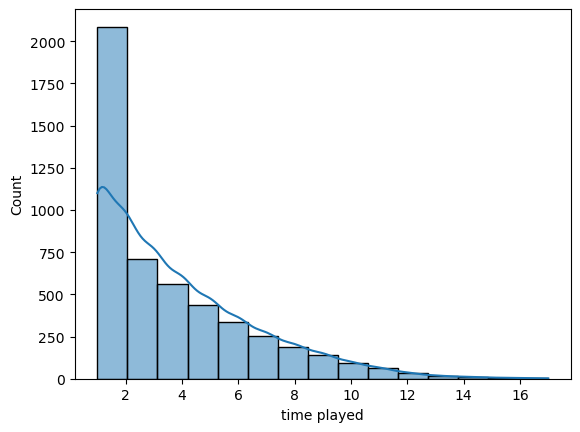

In [577]:
sns.histplot(dfNew['time played'], kde=True, bins=15)

In [578]:
# This dataset has some players that were playing before 2000, meaning that the years played variable may be sskewed because this is only observing the amount of years a player has been in a dataset, I do not currently have a solution that I can use to remove players that played before 2000

In [579]:
#As you can see, we have many observations where a player has played 1 year, but the drop off is extrememe, now I want to see how time played associates with salary.

<Axes: xlabel='time played', ylabel='salary'>

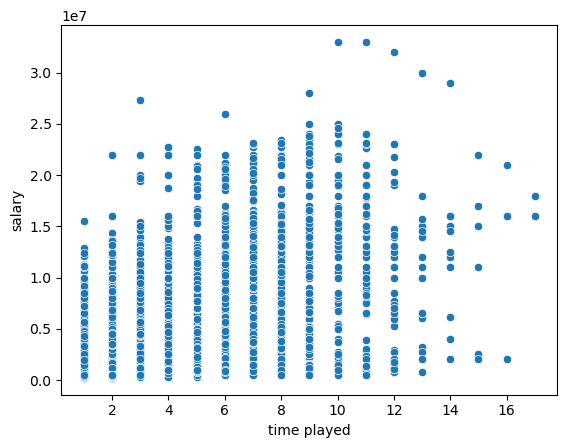

In [580]:
sns.scatterplot(x="time played", y="salary", data=dfNew)

In [581]:
# It looks like we're seeing somehwat of a bell curve with the maximum salaries someone could get. 

In [582]:
Fielding = pd.read_csv('core/Fielding.csv')

In [583]:
from sklearn.preprocessing import LabelBinarizer

In [584]:
dfField= Fielding.copy()
label_binarizer=  LabelBinarizer()
label_binarizer_output = label_binarizer.fit_transform( dfField['POS'])
result_dfField= pd.DataFrame(label_binarizer_output,
                             columns = label_binarizer.classes_)

In [585]:
result_dfField

1B  2B  3B  C  OF  P  SS
0        0   0   0  0   0  0   1
1        0   1   0  0   0  0   0
2        0   0   0  0   0  0   1
3        0   1   0  0   0  0   0
4        0   0   0  0   1  0   0
...     ..  ..  .. ..  .. ..  ..
147075   0   0   0  0   0  1   0
147076   0   0   0  0   0  1   0
147077   1   0   0  0   0  0   0
147078   0   0   0  0   0  1   0
147079   0   0   0  1   0  0   0

[147080 rows x 7 columns]

In [586]:
Fielding =pd.merge(Fielding, result_dfField, left_index=True, right_index=True)

In [587]:
Fielding =Fielding.drop(['lgID', 'POS', 'PB', 'WP', 'SB', 'CS', 'ZR',], axis=1)

In [588]:
Fielding= Fielding[~(Fielding['yearID'] <= 1999)]

In [589]:
Fielding= Fielding[~(Fielding['P'] == 1)]

In [590]:
Fielding = Fielding.drop(['P'], axis=1)

In [591]:
Fielding['teamID'] = Fielding['teamID'].replace(['CHA', 'NYA', 'FLO', 'NYN',
     'TBA', 'LAA', 'LAN', 'SFN', 'SLN', 'SDN', 'KCA',
       'CHN', 'WAS'], ['CHW', 'NYY', 'MIA', 'NYM', 'TBR', 'ANA', 'LAD', 'SFG', 'STL', 'SDP', 'KCR', 'CHC', 'WSN'])

In [592]:
Fielding[Fielding.duplicated(subset=['playerID', 'yearID', 'teamID'], keep=False)]

playerID  yearID  stint teamID   G    GS  InnOuts   PO   A    E  DP  \
106486  abbotku01    2000      1    NYM  23   8.0    312.0   23  29  1.0   3   
106487  abbotku01    2000      1    NYM   2   2.0     51.0    4   1  0.0   0   
106488  abbotku01    2000      1    NYM   2   0.0      9.0    0   0  0.0   0   
106489  abbotku01    2000      1    NYM  39  25.0    750.0   47  75  6.0  10   
106496  alcanis01    2000      1    BOS   5   0.0     21.0    9   0  0.0   1   
...           ...     ...    ...    ...  ..   ...      ...  ...  ..  ...  ..   
147053  wynnsau01    2021      1    BAL   1   0.0      3.0    1   0  0.0   0   
147054  wynnsau01    2021      1    BAL  44  39.0   1027.0  288  18  1.0   1   
147066  youngan02    2021      1    ARI  21  16.0    414.0   33  30  2.0   6   
147067  youngan02    2021      1    ARI   2   0.0      8.0    0   0  1.0   0   
147068  youngan02    2021      1    ARI   1   1.0     15.0    1   0  1.0   0   

        1B  2B  3B  C  OF  SS  
106486   0   1   0  0   0   0  
106487   0   0   1  0   0   0  
106488   0   0   0  0   1   0  
106489   0   0   0  0   0   1  
106496   1   0   0  0   0   0  
...     ..  ..  .. ..  ..  ..  
147053   1   0   0  0   0   0  
147054   0   0   0  1   0   0  
147066   0   1   0  0   0   0  
147067   0   0   1  0   0   0  
147068   0   0   0  0   1   0  

[14655 rows x 17 columns]

In [593]:
FieldingGrouped =  Fielding.groupby(['playerID', 'yearID'], as_index=False).agg({
    'G': 'sum',
    'GS': 'sum',
    'InnOuts': 'sum',
    'PO': 'sum',
    'A': 'sum',
    'E': 'sum',
    'DP': 'sum',
    '1B': 'sum',
    '2B': 'sum',
    '3B': 'sum',
    'C': 'sum',
    'OF': 'sum',
    'SS': 'sum'
})
FieldingGrouped['multiple_positions'] = (FieldingGrouped[['1B', '2B', '3B', 'C', 'OF', 'SS']].sum(axis=1) > 1).astype(int)


print(FieldingGrouped)


        playerID  yearID    G     GS  InnOuts   PO    A    E  DP  1B  2B  3B  \
0       abadan01    2001    1    0.0      3.0    2    0  0.0   1   1   0   0   
1       abadan01    2003    8    4.0    135.0   35    1  1.0   2   1   0   0   
2      abbotje01    2000   65   50.0   1357.0  101    2  2.0   0   0   0   0   
3      abbotje01    2001   17    8.0    257.0   26    0  1.0   0   0   0   0   
4      abbotku01    2000   66   35.0   1122.0   74  105  7.0  13   0   1   1   
...          ...     ...  ...    ...      ...  ...  ...  ...  ..  ..  ..  ..   
13650  zuninmi01    2017  120  112.0   2982.0  894   56  7.0   5   0   0   0   
13651  zuninmi01    2018  111  101.0   2765.0  880   43  2.0   5   0   0   0   
13652  zuninmi01    2019   89   78.0   2069.0  764   37  6.0   7   0   0   0   
13653  zuninmi01    2020   28   25.0    647.0  244   15  1.0   2   0   0   0   
13654  zuninmi01    2021  105   97.0   2581.0  909   37  5.0   2   0   0   0   

       C  OF  SS  multiple_positions  


In [594]:
FieldingGrouped

playerID  yearID    G     GS  InnOuts   PO    A    E  DP  1B  2B  3B  \
0       abadan01    2001    1    0.0      3.0    2    0  0.0   1   1   0   0   
1       abadan01    2003    8    4.0    135.0   35    1  1.0   2   1   0   0   
2      abbotje01    2000   65   50.0   1357.0  101    2  2.0   0   0   0   0   
3      abbotje01    2001   17    8.0    257.0   26    0  1.0   0   0   0   0   
4      abbotku01    2000   66   35.0   1122.0   74  105  7.0  13   0   1   1   
...          ...     ...  ...    ...      ...  ...  ...  ...  ..  ..  ..  ..   
13650  zuninmi01    2017  120  112.0   2982.0  894   56  7.0   5   0   0   0   
13651  zuninmi01    2018  111  101.0   2765.0  880   43  2.0   5   0   0   0   
13652  zuninmi01    2019   89   78.0   2069.0  764   37  6.0   7   0   0   0   
13653  zuninmi01    2020   28   25.0    647.0  244   15  1.0   2   0   0   0   
13654  zuninmi01    2021  105   97.0   2581.0  909   37  5.0   2   0   0   0   

       C  OF  SS  multiple_positions  
0      0   0   0                   0  
1      0   1   0                   1  
2      0   1   0                   0  
3      0   1   0                   0  
4      0   1   1                   1  
...   ..  ..  ..                 ...  
13650  1   0   0                   0  
13651  1   0   0                   0  
13652  1   0   0                   0  
13653  1   0   0                   0  
13654  1   0   0                   0  

[13655 rows x 16 columns]

In [595]:
Fielding= FieldingGrouped[~(FieldingGrouped['yearID'] > 2016)]

In [596]:
print(Fielding['multiple_positions'].value_counts())


0    6250
1    4294
Name: multiple_positions, dtype: int64


In [597]:
Fielding[Fielding.duplicated(subset=['playerID', 'yearID'], keep=False)]

Empty DataFrame
Columns: [playerID, yearID, G, GS, InnOuts, PO, A, E, DP, 1B, 2B, 3B, C, OF, SS, multiple_positions]
Index: []

In [598]:
dfNew = pd.merge(dfNew, Fielding, on=['playerID', 'yearID'], how='outer')
dfNew.drop_duplicates(subset=['playerID', 'yearID'], inplace=True)

In [599]:
dfNew = dfNew.dropna()


In [600]:
print(dfNew['multiple_positions'].value_counts())


0.0    3198
1.0    1719
Name: multiple_positions, dtype: int64


In [601]:
dfNew.isnull().sum()

playerID              0
Name                  0
yearID                0
teamID                0
lgID                  0
                     ..
3B_y                  0
C                     0
OF                    0
SS                    0
multiple_positions    0
Length: 93, dtype: int64

In [602]:
dfNew['TeamNumber'] = dfNew['Team'].astype('category').cat.codes

In [603]:
dfNew

playerID         Name  yearID teamID lgID      salary       IDfg  \
0     abbotje01  Jeff Abbott    2000    CHW   AL    255000.0  1000011.0   
1     abbotku01  Kurt Abbott    2000    NYM   NL    500000.0  1000013.0   
2     abreubo01  Bobby Abreu    2000    PHI   NL   2933333.0      945.0   
3     abreubo01  Bobby Abreu    2001    PHI   NL   4983000.0      945.0   
4     abreubo01  Bobby Abreu    2002    PHI   NL   6333333.0      945.0   
...         ...          ...     ...    ...  ...         ...        ...   
4934  zobribe01  Ben Zobrist    2013    TBR   AL   5687300.0     7435.0   
4935  zobribe01  Ben Zobrist    2014    TBR   AL   7000000.0     7435.0   
4936  zobribe01  Ben Zobrist    2016    CHC   NL  10500000.0     7435.0   
4937  zuninmi01  Mike Zunino    2014    SEA   AL    504100.0    13265.0   
4938  zuninmi01  Mike Zunino    2015    SEA   AL    523500.0    13265.0   

      Season Team   Age    G_x     AB     PA      H   1B_x  2B_x  3B_x    HR  \
0     2000.0  CHW  27.0   80.0  215.0  242.0   59.0   40.0  15.0   1.0   3.0   
1     2000.0  NYM  31.0   79.0  157.0  173.0   34.0   20.0   7.0   1.0   6.0   
2     2000.0  PHI  26.0  154.0  576.0  680.0  182.0  105.0  42.0  10.0  25.0   
3     2001.0  PHI  27.0  162.0  588.0  704.0  170.0   87.0  48.0   4.0  31.0   
4     2002.0  PHI  28.0  157.0  572.0  685.0  176.0  100.0  50.0   6.0  20.0   
...      ...  ...   ...    ...    ...    ...    ...    ...   ...   ...   ...   
4934  2013.0  TBR  32.0  157.0  612.0  698.0  168.0  117.0  36.0   3.0  12.0   
4935  2014.0  TBR  33.0  146.0  570.0  654.0  155.0  108.0  34.0   3.0  10.0   
4936  2016.0  CHC  35.0  147.0  523.0  631.0  142.0   90.0  31.0   3.0  18.0   
4937  2014.0  SEA  23.0  131.0  438.0  476.0   87.0   43.0  20.0   2.0  22.0   
4938  2015.0  SEA  24.0  112.0  350.0  386.0   61.0   39.0  11.0   0.0  11.0   

          R    RBI     BB   IBB     SO   HBP   SF   SH   GDP    SB    CS  \
0      31.0   29.0   21.0   1.0   38.0   2.0  1.0  2.0   2.0   2.0   1.0   
1      22.0   12.0   14.0   2.0   51.0   1.0  1.0  0.0   2.0   1.0   1.0   
2     103.0   79.0  100.0   9.0  116.0   1.0  3.0  0.0  12.0  28.0   8.0   
3     118.0  110.0  106.0  11.0  137.0   1.0  9.0  0.0  13.0  36.0  14.0   
4     102.0   85.0  104.0   9.0  117.0   3.0  6.0  0.0  11.0  31.0  12.0   
...     ...    ...    ...   ...    ...   ...  ...  ...   ...   ...   ...   
4934   77.0   71.0   72.0   4.0   91.0   7.0  6.0  1.0  18.0  11.0   3.0   
4935   83.0   52.0   75.0   4.0   84.0   1.0  6.0  2.0   8.0  10.0   5.0   
4936   94.0   76.0   96.0   6.0   82.0   4.0  4.0  4.0  17.0   6.0   4.0   
4937   51.0   60.0   17.0   1.0  158.0  17.0  4.0  0.0  13.0   0.0   3.0   
4938   28.0   28.0   21.0   0.0  132.0   5.0  2.0  8.0   6.0   0.0   1.0   

        AVG    BB%     K%  BB/K    OBP    SLG    OPS    ISO  BABIP   wOBA  \
0     0.274  0.087  0.157  0.55  0.343  0.395  0.738  0.121  0.320  0.328   
1     0.217  0.081  0.295  0.27  0.283  0.389  0.672  0.172  0.277  0.289   
2     0.316  0.147  0.171  0.86  0.416  0.554  0.970  0.238  0.358  0.413   
3     0.289  0.151  0.195  0.77  0.393  0.543  0.936  0.253  0.324  0.393   
4     0.308  0.152  0.171  0.89  0.413  0.521  0.934  0.213  0.354  0.401   
...     ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
4934  0.275  0.103  0.130  0.79  0.354  0.402  0.756  0.127  0.303  0.334   
4935  0.272  0.115  0.128  0.89  0.354  0.395  0.749  0.123  0.301  0.333   
4936  0.272  0.152  0.130  1.17  0.386  0.446  0.831  0.174  0.290  0.360   
4937  0.199  0.036  0.332  0.11  0.254  0.404  0.658  0.205  0.248  0.290   
4938  0.174  0.054  0.342  0.16  0.230  0.300  0.530  0.126  0.239  0.235   

      wRAA    wRC   Bat   Rep  Pos   RAR  WAR  Spd   wRC+   WPA   -WPA   +WPA  \
0     -2.7   29.0  -4.2   7.8 -1.6  -2.1 -0.2  3.9   87.0  0.37  -3.89   4.26   
1     -7.8   15.0  -7.7   5.6  1.5  -2.6 -0.3  4.2   67.0 -0.40  -3.05   2.65   
2     43.1  132.0  40.0  22.0 -6.8  73.2  6.9  6.8  143.0  4.76 

In [604]:
dfNew = dfNew.rename(columns={'1B_y': 'Plays_1B', '2B_y': 'Plays_2B', '3B_y': 'Plays_3B'})


In [605]:
dfNew

playerID         Name  yearID teamID lgID      salary       IDfg  \
0     abbotje01  Jeff Abbott    2000    CHW   AL    255000.0  1000011.0   
1     abbotku01  Kurt Abbott    2000    NYM   NL    500000.0  1000013.0   
2     abreubo01  Bobby Abreu    2000    PHI   NL   2933333.0      945.0   
3     abreubo01  Bobby Abreu    2001    PHI   NL   4983000.0      945.0   
4     abreubo01  Bobby Abreu    2002    PHI   NL   6333333.0      945.0   
...         ...          ...     ...    ...  ...         ...        ...   
4934  zobribe01  Ben Zobrist    2013    TBR   AL   5687300.0     7435.0   
4935  zobribe01  Ben Zobrist    2014    TBR   AL   7000000.0     7435.0   
4936  zobribe01  Ben Zobrist    2016    CHC   NL  10500000.0     7435.0   
4937  zuninmi01  Mike Zunino    2014    SEA   AL    504100.0    13265.0   
4938  zuninmi01  Mike Zunino    2015    SEA   AL    523500.0    13265.0   

      Season Team   Age    G_x     AB     PA      H   1B_x  2B_x  3B_x    HR  \
0     2000.0  CHW  27.0   80.0  215.0  242.0   59.0   40.0  15.0   1.0   3.0   
1     2000.0  NYM  31.0   79.0  157.0  173.0   34.0   20.0   7.0   1.0   6.0   
2     2000.0  PHI  26.0  154.0  576.0  680.0  182.0  105.0  42.0  10.0  25.0   
3     2001.0  PHI  27.0  162.0  588.0  704.0  170.0   87.0  48.0   4.0  31.0   
4     2002.0  PHI  28.0  157.0  572.0  685.0  176.0  100.0  50.0   6.0  20.0   
...      ...  ...   ...    ...    ...    ...    ...    ...   ...   ...   ...   
4934  2013.0  TBR  32.0  157.0  612.0  698.0  168.0  117.0  36.0   3.0  12.0   
4935  2014.0  TBR  33.0  146.0  570.0  654.0  155.0  108.0  34.0   3.0  10.0   
4936  2016.0  CHC  35.0  147.0  523.0  631.0  142.0   90.0  31.0   3.0  18.0   
4937  2014.0  SEA  23.0  131.0  438.0  476.0   87.0   43.0  20.0   2.0  22.0   
4938  2015.0  SEA  24.0  112.0  350.0  386.0   61.0   39.0  11.0   0.0  11.0   

          R    RBI     BB   IBB     SO   HBP   SF   SH   GDP    SB    CS  \
0      31.0   29.0   21.0   1.0   38.0   2.0  1.0  2.0   2.0   2.0   1.0   
1      22.0   12.0   14.0   2.0   51.0   1.0  1.0  0.0   2.0   1.0   1.0   
2     103.0   79.0  100.0   9.0  116.0   1.0  3.0  0.0  12.0  28.0   8.0   
3     118.0  110.0  106.0  11.0  137.0   1.0  9.0  0.0  13.0  36.0  14.0   
4     102.0   85.0  104.0   9.0  117.0   3.0  6.0  0.0  11.0  31.0  12.0   
...     ...    ...    ...   ...    ...   ...  ...  ...   ...   ...   ...   
4934   77.0   71.0   72.0   4.0   91.0   7.0  6.0  1.0  18.0  11.0   3.0   
4935   83.0   52.0   75.0   4.0   84.0   1.0  6.0  2.0   8.0  10.0   5.0   
4936   94.0   76.0   96.0   6.0   82.0   4.0  4.0  4.0  17.0   6.0   4.0   
4937   51.0   60.0   17.0   1.0  158.0  17.0  4.0  0.0  13.0   0.0   3.0   
4938   28.0   28.0   21.0   0.0  132.0   5.0  2.0  8.0   6.0   0.0   1.0   

        AVG    BB%     K%  BB/K    OBP    SLG    OPS    ISO  BABIP   wOBA  \
0     0.274  0.087  0.157  0.55  0.343  0.395  0.738  0.121  0.320  0.328   
1     0.217  0.081  0.295  0.27  0.283  0.389  0.672  0.172  0.277  0.289   
2     0.316  0.147  0.171  0.86  0.416  0.554  0.970  0.238  0.358  0.413   
3     0.289  0.151  0.195  0.77  0.393  0.543  0.936  0.253  0.324  0.393   
4     0.308  0.152  0.171  0.89  0.413  0.521  0.934  0.213  0.354  0.401   
...     ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
4934  0.275  0.103  0.130  0.79  0.354  0.402  0.756  0.127  0.303  0.334   
4935  0.272  0.115  0.128  0.89  0.354  0.395  0.749  0.123  0.301  0.333   
4936  0.272  0.152  0.130  1.17  0.386  0.446  0.831  0.174  0.290  0.360   
4937  0.199  0.036  0.332  0.11  0.254  0.404  0.658  0.205  0.248  0.290   
4938  0.174  0.054  0.342  0.16  0.230  0.300  0.530  0.126  0.239  0.235   

      wRAA    wRC   Bat   Rep  Pos   RAR  WAR  Spd   wRC+   WPA   -WPA   +WPA  \
0     -2.7   29.0  -4.2   7.8 -1.6  -2.1 -0.2  3.9   87.0  0.37  -3.89   4.26   
1     -7.8   15.0  -7.7   5.6  1.5  -2.6 -0.3  4.2   67.0 -0.40  -3.05   2.65   
2     43.1  132.0  40.0  22.0 -6.8  73.2  6.9  6.8  143.0  4.76 

In [606]:
dfNew = dfNew.drop(['G_y'], axis=1)
dfNew = dfNew.rename(columns={'GS' : 'Games Started'})
dfNew = dfNew.rename(columns={'1B_x': 'Singles', '2B_x': 'Doubles', '3B_x': 'Triples'})
dfNew

playerID         Name  yearID teamID lgID      salary       IDfg  \
0     abbotje01  Jeff Abbott    2000    CHW   AL    255000.0  1000011.0   
1     abbotku01  Kurt Abbott    2000    NYM   NL    500000.0  1000013.0   
2     abreubo01  Bobby Abreu    2000    PHI   NL   2933333.0      945.0   
3     abreubo01  Bobby Abreu    2001    PHI   NL   4983000.0      945.0   
4     abreubo01  Bobby Abreu    2002    PHI   NL   6333333.0      945.0   
...         ...          ...     ...    ...  ...         ...        ...   
4934  zobribe01  Ben Zobrist    2013    TBR   AL   5687300.0     7435.0   
4935  zobribe01  Ben Zobrist    2014    TBR   AL   7000000.0     7435.0   
4936  zobribe01  Ben Zobrist    2016    CHC   NL  10500000.0     7435.0   
4937  zuninmi01  Mike Zunino    2014    SEA   AL    504100.0    13265.0   
4938  zuninmi01  Mike Zunino    2015    SEA   AL    523500.0    13265.0   

      Season Team   Age    G_x     AB     PA      H  Singles  Doubles  \
0     2000.0  CHW  27.0   80.0  215.0  242.0   59.0     40.0     15.0   
1     2000.0  NYM  31.0   79.0  157.0  173.0   34.0     20.0      7.0   
2     2000.0  PHI  26.0  154.0  576.0  680.0  182.0    105.0     42.0   
3     2001.0  PHI  27.0  162.0  588.0  704.0  170.0     87.0     48.0   
4     2002.0  PHI  28.0  157.0  572.0  685.0  176.0    100.0     50.0   
...      ...  ...   ...    ...    ...    ...    ...      ...      ...   
4934  2013.0  TBR  32.0  157.0  612.0  698.0  168.0    117.0     36.0   
4935  2014.0  TBR  33.0  146.0  570.0  654.0  155.0    108.0     34.0   
4936  2016.0  CHC  35.0  147.0  523.0  631.0  142.0     90.0     31.0   
4937  2014.0  SEA  23.0  131.0  438.0  476.0   87.0     43.0     20.0   
4938  2015.0  SEA  24.0  112.0  350.0  386.0   61.0     39.0     11.0   

      Triples    HR      R    RBI     BB   IBB     SO   HBP   SF   SH   GDP  \
0         1.0   3.0   31.0   29.0   21.0   1.0   38.0   2.0  1.0  2.0   2.0   
1         1.0   6.0   22.0   12.0   14.0   2.0   51.0   1.0  1.0  0.0   2.0   
2        10.0  25.0  103.0   79.0  100.0   9.0  116.0   1.0  3.0  0.0  12.0   
3         4.0  31.0  118.0  110.0  106.0  11.0  137.0   1.0  9.0  0.0  13.0   
4         6.0  20.0  102.0   85.0  104.0   9.0  117.0   3.0  6.0  0.0  11.0   
...       ...   ...    ...    ...    ...   ...    ...   ...  ...  ...   ...   
4934      3.0  12.0   77.0   71.0   72.0   4.0   91.0   7.0  6.0  1.0  18.0   
4935      3.0  10.0   83.0   52.0   75.0   4.0   84.0   1.0  6.0  2.0   8.0   
4936      3.0  18.0   94.0   76.0   96.0   6.0   82.0   4.0  4.0  4.0  17.0   
4937      2.0  22.0   51.0   60.0   17.0   1.0  158.0  17.0  4.0  0.0  13.0   
4938      0.0  11.0   28.0   28.0   21.0   0.0  132.0   5.0  2.0  8.0   6.0   

        SB    CS    AVG    BB%     K%  BB/K    OBP    SLG    OPS    ISO  \
0      2.0   1.0  0.274  0.087  0.157  0.55  0.343  0.395  0.738  0.121   
1      1.0   1.0  0.217  0.081  0.295  0.27  0.283  0.389  0.672  0.172   
2     28.0   8.0  0.316  0.147  0.171  0.86  0.416  0.554  0.970  0.238   
3     36.0  14.0  0.289  0.151  0.195  0.77  0.393  0.543  0.936  0.253   
4     31.0  12.0  0.308  0.152  0.171  0.89  0.413  0.521  0.934  0.213   
...    ...   ...    ...    ...    ...   ...    ...    ...    ...    ...   
4934  11.0   3.0  0.275  0.103  0.130  0.79  0.354  0.402  0.756  0.127   
4935  10.0   5.0  0.272  0.115  0.128  0.89  0.354  0.395  0.749  0.123   
4936   6.0   4.0  0.272  0.152  0.130  1.17  0.386  0.446  0.831  0.174   
4937   0.0   3.0  0.199  0.036  0.332  0.11  0.254  0.404  0.658  0.205   
4938   0.0   1.0  0.174  0.054  0.342  0.16  0.230  0.300  0.530  0.126   

      BABIP   wOBA  wRAA    wRC   Bat   Rep  Pos   RAR  WAR  Spd   wRC+   WPA  \
0     0.320  0.328  -2.7   29.0  -4.2   7.8 -1.6  -2.1 -0.2  3.9   87.0  0.37   
1     0.277  0.289  -7.8   15.0  -7.7   5.6  1.5  -2.6 -0.3  4.2   67.0 -0.40   
2     0.358  0.413  43.1  132.0  40.0  22.0 -6.8  73.2  6.9  6.8  143.0  4.76   
3     0.324  0.393  39.0  126.0  36.1  22.0 -7.3  54.0 

In [607]:
def next_season(player):
    player= player.sort_values('Season')
    player["Next Salary"] = player['salary'].shift(-1)
    return player

dfNew = dfNew.groupby('playerID', group_keys=False).apply(next_season)

In [608]:
dfNew=dfNew.dropna()

In [609]:
dfNew

playerID         Name  yearID teamID lgID      salary     IDfg  Season  \
2     abreubo01  Bobby Abreu    2000    PHI   NL   2933333.0    945.0  2000.0   
3     abreubo01  Bobby Abreu    2001    PHI   NL   4983000.0    945.0  2001.0   
4     abreubo01  Bobby Abreu    2002    PHI   NL   6333333.0    945.0  2002.0   
5     abreubo01  Bobby Abreu    2003    PHI   NL   9100000.0    945.0  2003.0   
6     abreubo01  Bobby Abreu    2004    PHI   NL  10600000.0    945.0  2004.0   
...         ...          ...     ...    ...  ...         ...      ...     ...   
4932  zobribe01  Ben Zobrist    2011    TBR   AL   4687300.0   7435.0  2011.0   
4933  zobribe01  Ben Zobrist    2012    TBR   AL   4687300.0   7435.0  2012.0   
4934  zobribe01  Ben Zobrist    2013    TBR   AL   5687300.0   7435.0  2013.0   
4935  zobribe01  Ben Zobrist    2014    TBR   AL   7000000.0   7435.0  2014.0   
4937  zuninmi01  Mike Zunino    2014    SEA   AL    504100.0  13265.0  2014.0   

     Team   Age    G_x     AB     PA      H  Singles  Doubles  Triples    HR  \
2     PHI  26.0  154.0  576.0  680.0  182.0    105.0     42.0     10.0  25.0   
3     PHI  27.0  162.0  588.0  704.0  170.0     87.0     48.0      4.0  31.0   
4     PHI  28.0  157.0  572.0  685.0  176.0    100.0     50.0      6.0  20.0   
5     PHI  29.0  158.0  577.0  695.0  173.0    117.0     35.0      1.0  20.0   
6     PHI  30.0  159.0  574.0  713.0  173.0     95.0     47.0      1.0  30.0   
...   ...   ...    ...    ...    ...    ...      ...      ...      ...   ...   
4932  TBR  30.0  156.0  588.0  674.0  158.0     86.0     46.0      6.0  20.0   
4933  TBR  31.0  157.0  560.0  668.0  151.0     85.0     39.0      7.0  20.0   
4934  TBR  32.0  157.0  612.0  698.0  168.0    117.0     36.0      3.0  12.0   
4935  TBR  33.0  146.0  570.0  654.0  155.0    108.0     34.0      3.0  10.0   
4937  SEA  23.0  131.0  438.0  476.0   87.0     43.0     20.0      2.0  22.0   

          R    RBI     BB   IBB     SO   HBP   SF   SH   GDP    SB    CS  \
2     103.0   79.0  100.0   9.0  116.0   1.0  3.0  0.0  12.0  28.0   8.0   
3     118.0  110.0  106.0  11.0  137.0   1.0  9.0  0.0  13.0  36.0  14.0   
4     102.0   85.0  104.0   9.0  117.0   3.0  6.0  0.0  11.0  31.0  12.0   
5      99.0  101.0  109.0  13.0  126.0   2.0  7.0  0.0  13.0  22.0   9.0   
6     118.0  105.0  127.0  10.0  116.0   5.0  7.0  0.0   5.0  40.0   5.0   
...     ...    ...    ...   ...    ...   ...  ...  ...   ...   ...   ...   
4932   99.0   91.0   77.0   1.0  128.0   2.0  5.0  2.0   9.0  19.0   6.0   
4933   88.0   74.0   97.0   7.0  103.0   3.0  6.0  2.0  13.0  14.0   9.0   
4934   77.0   71.0   72.0   4.0   91.0   7.0  6.0  1.0  18.0  11.0   3.0   
4935   83.0   52.0   75.0   4.0   84.0   1.0  6.0  2.0   8.0  10.0   5.0   
4937   51.0   60.0   17.0   1.0  158.0  17.0  4.0  0.0  13.0   0.0   3.0   

        AVG    BB%     K%  BB/K    OBP    SLG    OPS    ISO  BABIP   wOBA  \
2     0.316  0.147  0.171  0.86  0.416  0.554  0.970  0.238  0.358  0.413   
3     0.289  0.151  0.195  0.77  0.393  0.543  0.936  0.253  0.324  0.393   
4     0.308  0.152  0.171  0.89  0.413  0.521  0.934  0.213  0.354  0.401   
5     0.300  0.157  0.181  0.87  0.409  0.468  0.877  0.168  0.349  0.379   
6     0.301  0.178  0.163  1.09  0.428  0.544  0.971  0.242  0.329  0.413   
...     ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
4932  0.269  0.114  0.190  0.60  0.353  0.469  0.822  0.201  0.310  0.359   
4933  0.270  0.145  0.154  0.94  0.377  0.471  0.848  0.202  0.296  0.365   
4934  0.275  0.103  0.130  0.79  0.354  0.402  0.756  0.127  0.303  0.334   
4935  0.272  0.115  0.128  0.89  0.354  0.395  0.749  0.123  0.301  0.333   
4937  0.199  0.036  0.332  0.11  0.254  0.404  0.658  0.205  0.248  0.290   

      wRAA    wRC   Bat   Rep  Pos   RAR  WAR  Spd   wRC+   WPA   -WPA   +WPA  \
2     43.1  132.0  40.0  22.0 -6.8  73.2  6.9  6.8  143.0  4.76 -10.29  15.05   
3     39.0  126.0  36.1  22.0 -7.3  54.0  5.3  6.1  139.0  3.78 -11.16  1

In [610]:
dfNew =dfNew.drop('Team', axis=1)


In [611]:
dfNew =dfNew.drop('Age Rng', axis=1)

In [612]:
dfNew

playerID         Name  yearID teamID lgID      salary     IDfg  Season  \
2     abreubo01  Bobby Abreu    2000    PHI   NL   2933333.0    945.0  2000.0   
3     abreubo01  Bobby Abreu    2001    PHI   NL   4983000.0    945.0  2001.0   
4     abreubo01  Bobby Abreu    2002    PHI   NL   6333333.0    945.0  2002.0   
5     abreubo01  Bobby Abreu    2003    PHI   NL   9100000.0    945.0  2003.0   
6     abreubo01  Bobby Abreu    2004    PHI   NL  10600000.0    945.0  2004.0   
...         ...          ...     ...    ...  ...         ...      ...     ...   
4932  zobribe01  Ben Zobrist    2011    TBR   AL   4687300.0   7435.0  2011.0   
4933  zobribe01  Ben Zobrist    2012    TBR   AL   4687300.0   7435.0  2012.0   
4934  zobribe01  Ben Zobrist    2013    TBR   AL   5687300.0   7435.0  2013.0   
4935  zobribe01  Ben Zobrist    2014    TBR   AL   7000000.0   7435.0  2014.0   
4937  zuninmi01  Mike Zunino    2014    SEA   AL    504100.0  13265.0  2014.0   

       Age    G_x     AB     PA      H  Singles  Doubles  Triples    HR  \
2     26.0  154.0  576.0  680.0  182.0    105.0     42.0     10.0  25.0   
3     27.0  162.0  588.0  704.0  170.0     87.0     48.0      4.0  31.0   
4     28.0  157.0  572.0  685.0  176.0    100.0     50.0      6.0  20.0   
5     29.0  158.0  577.0  695.0  173.0    117.0     35.0      1.0  20.0   
6     30.0  159.0  574.0  713.0  173.0     95.0     47.0      1.0  30.0   
...    ...    ...    ...    ...    ...      ...      ...      ...   ...   
4932  30.0  156.0  588.0  674.0  158.0     86.0     46.0      6.0  20.0   
4933  31.0  157.0  560.0  668.0  151.0     85.0     39.0      7.0  20.0   
4934  32.0  157.0  612.0  698.0  168.0    117.0     36.0      3.0  12.0   
4935  33.0  146.0  570.0  654.0  155.0    108.0     34.0      3.0  10.0   
4937  23.0  131.0  438.0  476.0   87.0     43.0     20.0      2.0  22.0   

          R    RBI     BB   IBB     SO   HBP   SF   SH   GDP    SB    CS  \
2     103.0   79.0  100.0   9.0  116.0   1.0  3.0  0.0  12.0  28.0   8.0   
3     118.0  110.0  106.0  11.0  137.0   1.0  9.0  0.0  13.0  36.0  14.0   
4     102.0   85.0  104.0   9.0  117.0   3.0  6.0  0.0  11.0  31.0  12.0   
5      99.0  101.0  109.0  13.0  126.0   2.0  7.0  0.0  13.0  22.0   9.0   
6     118.0  105.0  127.0  10.0  116.0   5.0  7.0  0.0   5.0  40.0   5.0   
...     ...    ...    ...   ...    ...   ...  ...  ...   ...   ...   ...   
4932   99.0   91.0   77.0   1.0  128.0   2.0  5.0  2.0   9.0  19.0   6.0   
4933   88.0   74.0   97.0   7.0  103.0   3.0  6.0  2.0  13.0  14.0   9.0   
4934   77.0   71.0   72.0   4.0   91.0   7.0  6.0  1.0  18.0  11.0   3.0   
4935   83.0   52.0   75.0   4.0   84.0   1.0  6.0  2.0   8.0  10.0   5.0   
4937   51.0   60.0   17.0   1.0  158.0  17.0  4.0  0.0  13.0   0.0   3.0   

        AVG    BB%     K%  BB/K    OBP    SLG    OPS    ISO  BABIP   wOBA  \
2     0.316  0.147  0.171  0.86  0.416  0.554  0.970  0.238  0.358  0.413   
3     0.289  0.151  0.195  0.77  0.393  0.543  0.936  0.253  0.324  0.393   
4     0.308  0.152  0.171  0.89  0.413  0.521  0.934  0.213  0.354  0.401   
5     0.300  0.157  0.181  0.87  0.409  0.468  0.877  0.168  0.349  0.379   
6     0.301  0.178  0.163  1.09  0.428  0.544  0.971  0.242  0.329  0.413   
...     ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
4932  0.269  0.114  0.190  0.60  0.353  0.469  0.822  0.201  0.310  0.359   
4933  0.270  0.145  0.154  0.94  0.377  0.471  0.848  0.202  0.296  0.365   
4934  0.275  0.103  0.130  0.79  0.354  0.402  0.756  0.127  0.303  0.334   
4935  0.272  0.115  0.128  0.89  0.354  0.395  0.749  0.123  0.301  0.333   
4937  0.199  0.036  0.332  0.11  0.254  0.404  0.658  0.205  0.248  0.290   

      wRAA    wRC   Bat   Rep  Pos   RAR  WAR  Spd   wRC+   WPA   -WPA   +WPA  \
2     43.1  132.0  40.0  22.0 -6.8  73.2  6.9  6.8  143.0  4.76 -10.29  15.05   
3     39.0  126.0  36.1  22.0 -7.3  54.0  5.3  6.1  139.0  3.78 -11.16  14.93   
4     42.4  125.0  40.7  20.9 -6.1  52.0  5.2  6.1  

In [613]:
dfNew.to_csv('FullDataSet3.csv')


<Axes: xlabel='multiple_positions', ylabel='salary'>

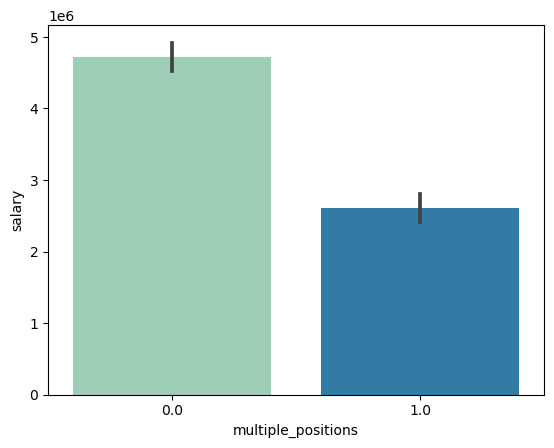

In [614]:
sns.barplot(x="multiple_positions", y="salary", data=dfNew, palette="YlGnBu")

<Axes: xlabel='yearID', ylabel='salary'>

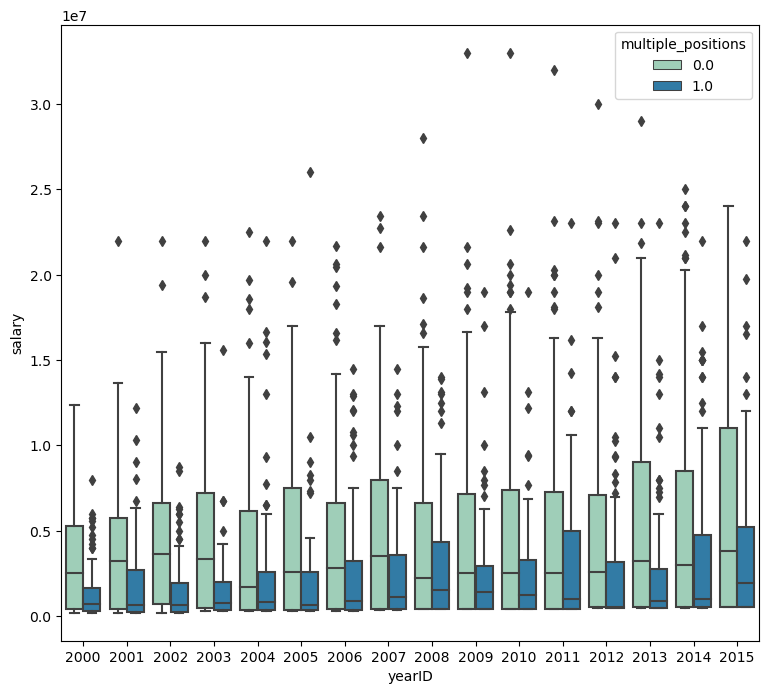

In [615]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,8))

sns.boxplot(x="yearID", y="salary", data=dfNew, hue="multiple_positions", palette="YlGnBu")

# no = 0, yes = 1

In [616]:
# People who play multiple positions may make less. Is this because maybe hitters who play multiple position are more wanted for their defensive talent and utility role over their offensive production? You need these players to round out the team but they wont put up numbers that make millions most of the time

C:\Users\Evan\AppData\Local\Temp\ipykernel_35004\3341396769.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Salary Dispersion", y="salary", data=dfNew, palette="YlGnBu")


<Axes: xlabel='Salary Dispersion', ylabel='salary'>

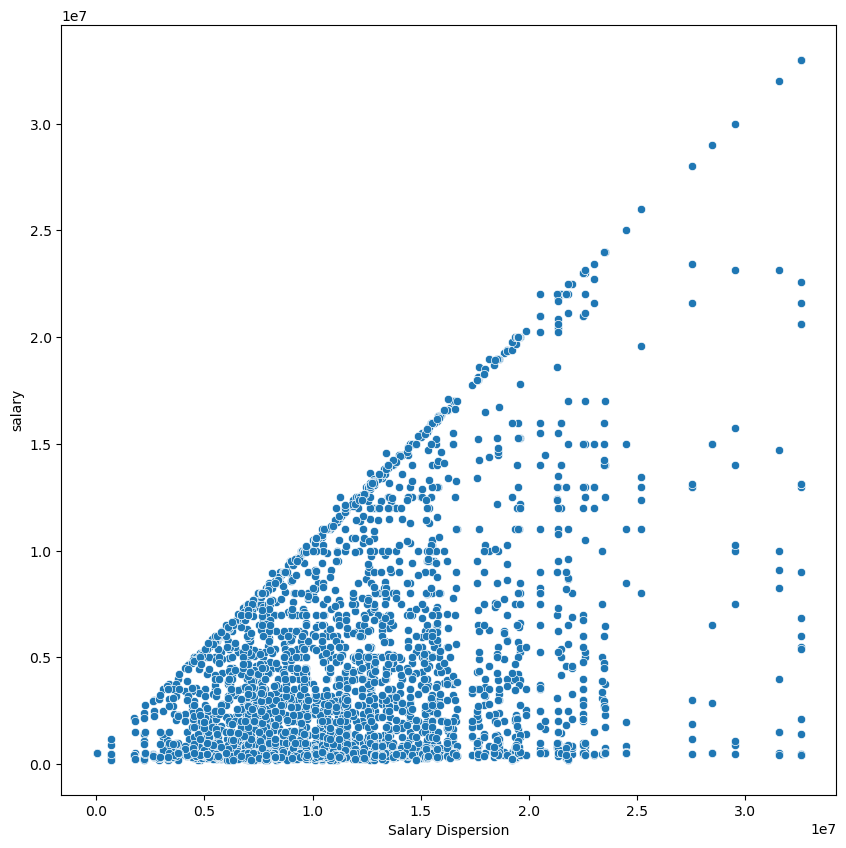

In [617]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

sns.scatterplot(x="Salary Dispersion", y="salary", data=dfNew, palette="YlGnBu")


C:\Users\Evan\AppData\Local\Temp\ipykernel_35004\3906341495.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Team WAR", y="salary", data=dfNew, palette="YlGnBu")


<Axes: xlabel='Team WAR', ylabel='salary'>

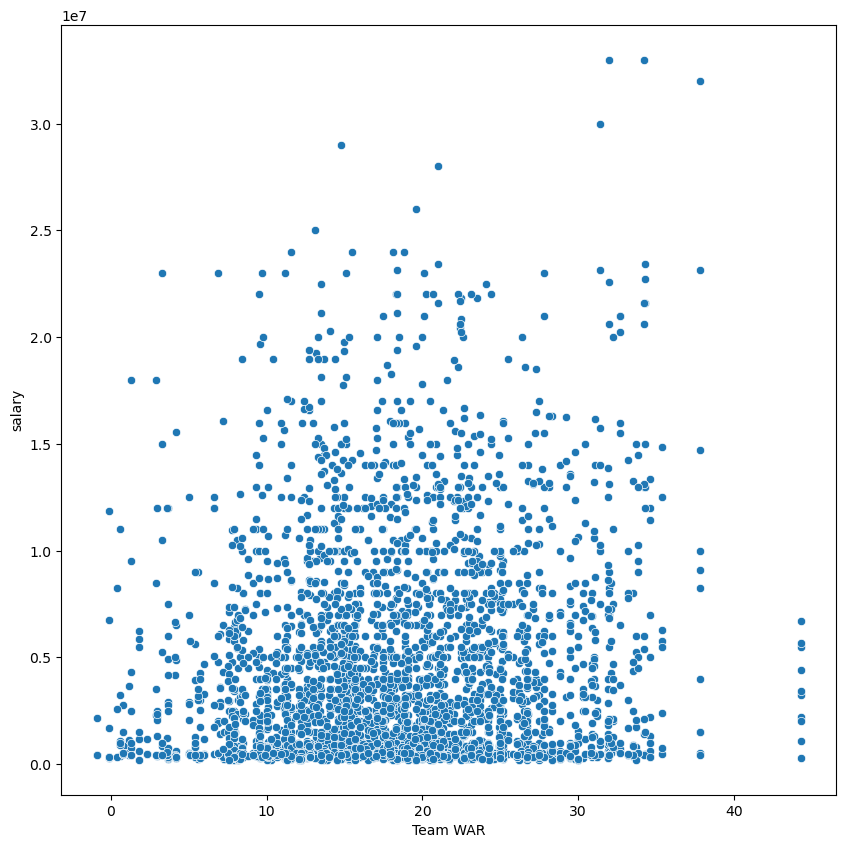

In [618]:

plt.figure(figsize=(10,10))

sns.scatterplot(x="Team WAR", y="salary", data=dfNew, palette="YlGnBu")

C:\Users\Evan\AppData\Local\Temp\ipykernel_35004\4114223734.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Team WAR", y="Salary Dispersion", data=dfNew, palette="YlGnBu")


<Axes: xlabel='Team WAR', ylabel='Salary Dispersion'>

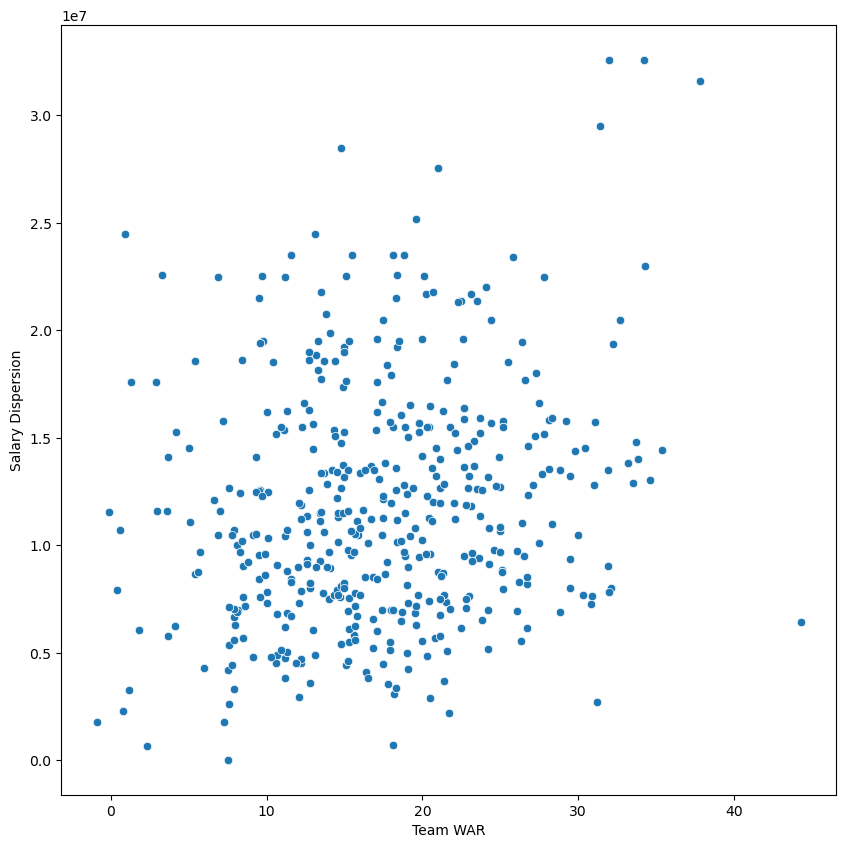

In [619]:

plt.figure(figsize=(10,10))

sns.scatterplot(x="Team WAR", y="Salary Dispersion", data=dfNew, palette="YlGnBu")

C:\Users\Evan\AppData\Local\Temp\ipykernel_35004\2155567489.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Rolling WAR Average", y="salary", data=dfNew, palette="YlGnBu")


<Axes: xlabel='Rolling WAR Average', ylabel='salary'>

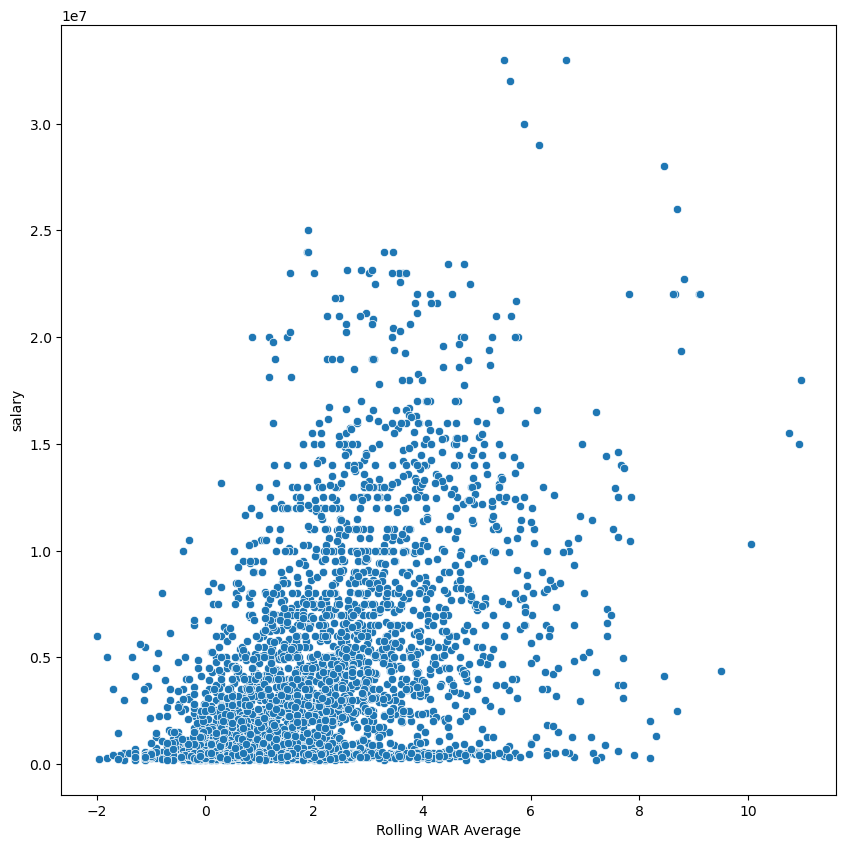

In [620]:

plt.figure(figsize=(10,10))

sns.scatterplot(x="Rolling WAR Average", y="salary", data=dfNew, palette="YlGnBu")

In [621]:
train = dfNew[dfNew['yearID'] < 2009].copy()
test = dfNew[dfNew["yearID"] >= 2009].copy()

In [622]:
train.shape

(2147, 92)

In [623]:
test.shape

(1593, 92)

In [624]:
from sklearn.linear_model import LinearRegression
Reg = LinearRegression()

In [625]:
dfNew1 = dfNew.copy()
FullDataSet = dfNew1.dropna().copy()

In [626]:
#I learned about Series Selectors, we have to make a feature selector, but first I found that creating a ridge regression model is helpful!
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit 
Reg = Ridge(alpha=5) # The alpha value, depending on what you set it as, can reduce over-fitting 
#The Model must not take int oaccount the future, the year must be taken into account so that it isn't using future years to predict previous salaries

split_data = TimeSeriesSplit(n_splits=3) 
sfs = SequentialFeatureSelector(Reg, n_features_to_select= 15, direction='forward', cv=split_data, n_jobs= 6)

In [627]:
remove= ['playerID' , 'Name', 'teamID', 'lgID', 'Next Salary', 'yearID', 'G_x', 'SH', 'PH', 'Season', 'time played', 'A', 'Pos']
use = dfNew.columns[~dfNew.columns.isin(remove)]

In [628]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
FullDataSet.loc[: , use] = scaler.fit_transform(FullDataSet[use])

In [629]:
sfs.fit(dfNew[use], dfNew['Next Salary'])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=Ridge(alpha=5), n_features_to_select=15,
                          n_jobs=6)

In [630]:
sfs.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False])

In [631]:
variables = list(use[sfs.get_support()])

In [632]:
variables

['salary',
 'Age',
 'RBI',
 'IBB',
 'GDP',
 'K%',
 'RAR',
 'WAR',
 'wSB',
 'AVG+',
 'BB%+',
 'Year Adjusted Salary',
 'Salary Dispersion',
 'DP',
 'SS']

In [633]:
#backtest generates the predictions. It will 
def backtest(data, model, variables, start=5, step=1):
    all_predictions = []
    years = sorted(data['yearID'].unique())
    
    for i in range (start, len(years), step): 
        current_year = years[i]
        
        train = data[data['yearID'] < current_year]
        test = data[data['yearID'] == current_year]
        
        model.fit(train[variables], train['Next Salary'])
        
        preds = model.predict(test[variables])
        preds= pd.Series(preds, index=test.index)
        combined = pd.concat([test['Next Salary'], preds], axis=1)
        combined.columns = ['actual', 'prediction'] 
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)   

In [634]:
predictions = backtest(dfNew, Reg, variables)

C:\Users\Evan\anaconda3\envs\baseballproject_env\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.0626e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Evan\anaconda3\envs\baseballproject_env\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.46578e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Evan\anaconda3\envs\baseballproject_env\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.7441e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Evan\anaconda3\envs\baseballproject_env\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.24433e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", ov

In [635]:
predictions

actual    prediction
7     15000000.0  1.306258e+07
24      343000.0  1.265771e+06
54     5827974.0  6.949138e+06
118     335000.0  1.729445e+06
128    1300000.0  1.144191e+06
...          ...           ...
4767  15800000.0  8.042175e+06
4840   1250000.0  1.788235e+06
4860  19364801.0  1.910234e+07
4863   1000000.0  2.297261e+06
4927  14000000.0  1.408584e+07

[2511 rows x 2 columns]

In [636]:
from sklearn.metrics import mean_squared_error

mean_squared_error(predictions['actual'], predictions['prediction'])

4919441208904.154

In [637]:
FullDataSet['Next Salary'].describe()

count    3.740000e+03
mean     4.711814e+06
std      5.211168e+06
min      2.000000e+05
25%      7.750000e+05
50%      2.750000e+06
75%      7.000000e+06
max      3.300000e+07
Name: Next Salary, dtype: float64

In [638]:
4899435380368.0

4899435380368.0

In [639]:
predictions.to_csv('Predictions.CSV')

In [640]:
def player_history(df):
    df= df.sort_values("playerID")
    df['Season'] = range(0, df.shape[0])
    df['Salary Correlation']= list(df[['Season', 'salary']].expanding().corr().loc[(slice(None), 'Season'), 'salary'])
    df['Salary Correlation'].fillna(1, inplace=True)
    
    df['Salary Ratio'] = df['salary']/ df['salary'].shift(1)
    df['Salary Ratio'].fillna(1, inplace=True)
    
    df['Salary Ratio'][df['Salary Ratio'] ==np.inf] = 1
    
    return df
dfNew = dfNew.groupby('playerID', group_keys=False).apply(player_history)

In [641]:
dfNew

playerID         Name  yearID teamID lgID      salary     IDfg  Season  \
2     abreubo01  Bobby Abreu    2000    PHI   NL   2933333.0    945.0       0   
3     abreubo01  Bobby Abreu    2001    PHI   NL   4983000.0    945.0       1   
4     abreubo01  Bobby Abreu    2002    PHI   NL   6333333.0    945.0       2   
5     abreubo01  Bobby Abreu    2003    PHI   NL   9100000.0    945.0       3   
6     abreubo01  Bobby Abreu    2004    PHI   NL  10600000.0    945.0       4   
...         ...          ...     ...    ...  ...         ...      ...     ...   
4932  zobribe01  Ben Zobrist    2011    TBR   AL   4687300.0   7435.0       3   
4933  zobribe01  Ben Zobrist    2012    TBR   AL   4687300.0   7435.0       4   
4934  zobribe01  Ben Zobrist    2013    TBR   AL   5687300.0   7435.0       5   
4935  zobribe01  Ben Zobrist    2014    TBR   AL   7000000.0   7435.0       6   
4937  zuninmi01  Mike Zunino    2014    SEA   AL    504100.0  13265.0       0   

       Age    G_x     AB     PA      H  Singles  Doubles  Triples    HR  \
2     26.0  154.0  576.0  680.0  182.0    105.0     42.0     10.0  25.0   
3     27.0  162.0  588.0  704.0  170.0     87.0     48.0      4.0  31.0   
4     28.0  157.0  572.0  685.0  176.0    100.0     50.0      6.0  20.0   
5     29.0  158.0  577.0  695.0  173.0    117.0     35.0      1.0  20.0   
6     30.0  159.0  574.0  713.0  173.0     95.0     47.0      1.0  30.0   
...    ...    ...    ...    ...    ...      ...      ...      ...   ...   
4932  30.0  156.0  588.0  674.0  158.0     86.0     46.0      6.0  20.0   
4933  31.0  157.0  560.0  668.0  151.0     85.0     39.0      7.0  20.0   
4934  32.0  157.0  612.0  698.0  168.0    117.0     36.0      3.0  12.0   
4935  33.0  146.0  570.0  654.0  155.0    108.0     34.0      3.0  10.0   
4937  23.0  131.0  438.0  476.0   87.0     43.0     20.0      2.0  22.0   

          R    RBI     BB   IBB     SO   HBP   SF   SH   GDP    SB    CS  \
2     103.0   79.0  100.0   9.0  116.0   1.0  3.0  0.0  12.0  28.0   8.0   
3     118.0  110.0  106.0  11.0  137.0   1.0  9.0  0.0  13.0  36.0  14.0   
4     102.0   85.0  104.0   9.0  117.0   3.0  6.0  0.0  11.0  31.0  12.0   
5      99.0  101.0  109.0  13.0  126.0   2.0  7.0  0.0  13.0  22.0   9.0   
6     118.0  105.0  127.0  10.0  116.0   5.0  7.0  0.0   5.0  40.0   5.0   
...     ...    ...    ...   ...    ...   ...  ...  ...   ...   ...   ...   
4932   99.0   91.0   77.0   1.0  128.0   2.0  5.0  2.0   9.0  19.0   6.0   
4933   88.0   74.0   97.0   7.0  103.0   3.0  6.0  2.0  13.0  14.0   9.0   
4934   77.0   71.0   72.0   4.0   91.0   7.0  6.0  1.0  18.0  11.0   3.0   
4935   83.0   52.0   75.0   4.0   84.0   1.0  6.0  2.0   8.0  10.0   5.0   
4937   51.0   60.0   17.0   1.0  158.0  17.0  4.0  0.0  13.0   0.0   3.0   

        AVG    BB%     K%  BB/K    OBP    SLG    OPS    ISO  BABIP   wOBA  \
2     0.316  0.147  0.171  0.86  0.416  0.554  0.970  0.238  0.358  0.413   
3     0.289  0.151  0.195  0.77  0.393  0.543  0.936  0.253  0.324  0.393   
4     0.308  0.152  0.171  0.89  0.413  0.521  0.934  0.213  0.354  0.401   
5     0.300  0.157  0.181  0.87  0.409  0.468  0.877  0.168  0.349  0.379   
6     0.301  0.178  0.163  1.09  0.428  0.544  0.971  0.242  0.329  0.413   
...     ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
4932  0.269  0.114  0.190  0.60  0.353  0.469  0.822  0.201  0.310  0.359   
4933  0.270  0.145  0.154  0.94  0.377  0.471  0.848  0.202  0.296  0.365   
4934  0.275  0.103  0.130  0.79  0.354  0.402  0.756  0.127  0.303  0.334   
4935  0.272  0.115  0.128  0.89  0.354  0.395  0.749  0.123  0.301  0.333   
4937  0.199  0.036  0.332  0.11  0.254  0.404  0.658  0.205  0.248  0.290   

      wRAA    wRC   Bat   Rep  Pos   RAR  WAR  Spd   wRC+   WPA   -WPA   +WPA  \
2     43.1  132.0  40.0  22.0 -6.8  73.2  6.9  6.8  143.0  4.76 -10.29  15.05   
3     39.0  126.0  36.1  22.0 -7.3  54.0  5.3  6.1  139.0  3.78 -11.16  14.93   
4     42.4  125.0  40.7  20.9 -6.1  52.0  5.2  6.1  

In [642]:
def group_averages(df): 
    return df['salary'] / df ['salary'].mean()

In [643]:
dfNew['Salary Season'] = dfNew.groupby('Season', group_keys= False).apply(group_averages)

In [644]:
dfNew

playerID         Name  yearID teamID lgID      salary     IDfg  Season  \
2     abreubo01  Bobby Abreu    2000    PHI   NL   2933333.0    945.0       0   
3     abreubo01  Bobby Abreu    2001    PHI   NL   4983000.0    945.0       1   
4     abreubo01  Bobby Abreu    2002    PHI   NL   6333333.0    945.0       2   
5     abreubo01  Bobby Abreu    2003    PHI   NL   9100000.0    945.0       3   
6     abreubo01  Bobby Abreu    2004    PHI   NL  10600000.0    945.0       4   
...         ...          ...     ...    ...  ...         ...      ...     ...   
4932  zobribe01  Ben Zobrist    2011    TBR   AL   4687300.0   7435.0       3   
4933  zobribe01  Ben Zobrist    2012    TBR   AL   4687300.0   7435.0       4   
4934  zobribe01  Ben Zobrist    2013    TBR   AL   5687300.0   7435.0       5   
4935  zobribe01  Ben Zobrist    2014    TBR   AL   7000000.0   7435.0       6   
4937  zuninmi01  Mike Zunino    2014    SEA   AL    504100.0  13265.0       0   

       Age    G_x     AB     PA      H  Singles  Doubles  Triples    HR  \
2     26.0  154.0  576.0  680.0  182.0    105.0     42.0     10.0  25.0   
3     27.0  162.0  588.0  704.0  170.0     87.0     48.0      4.0  31.0   
4     28.0  157.0  572.0  685.0  176.0    100.0     50.0      6.0  20.0   
5     29.0  158.0  577.0  695.0  173.0    117.0     35.0      1.0  20.0   
6     30.0  159.0  574.0  713.0  173.0     95.0     47.0      1.0  30.0   
...    ...    ...    ...    ...    ...      ...      ...      ...   ...   
4932  30.0  156.0  588.0  674.0  158.0     86.0     46.0      6.0  20.0   
4933  31.0  157.0  560.0  668.0  151.0     85.0     39.0      7.0  20.0   
4934  32.0  157.0  612.0  698.0  168.0    117.0     36.0      3.0  12.0   
4935  33.0  146.0  570.0  654.0  155.0    108.0     34.0      3.0  10.0   
4937  23.0  131.0  438.0  476.0   87.0     43.0     20.0      2.0  22.0   

          R    RBI     BB   IBB     SO   HBP   SF   SH   GDP    SB    CS  \
2     103.0   79.0  100.0   9.0  116.0   1.0  3.0  0.0  12.0  28.0   8.0   
3     118.0  110.0  106.0  11.0  137.0   1.0  9.0  0.0  13.0  36.0  14.0   
4     102.0   85.0  104.0   9.0  117.0   3.0  6.0  0.0  11.0  31.0  12.0   
5      99.0  101.0  109.0  13.0  126.0   2.0  7.0  0.0  13.0  22.0   9.0   
6     118.0  105.0  127.0  10.0  116.0   5.0  7.0  0.0   5.0  40.0   5.0   
...     ...    ...    ...   ...    ...   ...  ...  ...   ...   ...   ...   
4932   99.0   91.0   77.0   1.0  128.0   2.0  5.0  2.0   9.0  19.0   6.0   
4933   88.0   74.0   97.0   7.0  103.0   3.0  6.0  2.0  13.0  14.0   9.0   
4934   77.0   71.0   72.0   4.0   91.0   7.0  6.0  1.0  18.0  11.0   3.0   
4935   83.0   52.0   75.0   4.0   84.0   1.0  6.0  2.0   8.0  10.0   5.0   
4937   51.0   60.0   17.0   1.0  158.0  17.0  4.0  0.0  13.0   0.0   3.0   

        AVG    BB%     K%  BB/K    OBP    SLG    OPS    ISO  BABIP   wOBA  \
2     0.316  0.147  0.171  0.86  0.416  0.554  0.970  0.238  0.358  0.413   
3     0.289  0.151  0.195  0.77  0.393  0.543  0.936  0.253  0.324  0.393   
4     0.308  0.152  0.171  0.89  0.413  0.521  0.934  0.213  0.354  0.401   
5     0.300  0.157  0.181  0.87  0.409  0.468  0.877  0.168  0.349  0.379   
6     0.301  0.178  0.163  1.09  0.428  0.544  0.971  0.242  0.329  0.413   
...     ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
4932  0.269  0.114  0.190  0.60  0.353  0.469  0.822  0.201  0.310  0.359   
4933  0.270  0.145  0.154  0.94  0.377  0.471  0.848  0.202  0.296  0.365   
4934  0.275  0.103  0.130  0.79  0.354  0.402  0.756  0.127  0.303  0.334   
4935  0.272  0.115  0.128  0.89  0.354  0.395  0.749  0.123  0.301  0.333   
4937  0.199  0.036  0.332  0.11  0.254  0.404  0.658  0.205  0.248  0.290   

      wRAA    wRC   Bat   Rep  Pos   RAR  WAR  Spd   wRC+   WPA   -WPA   +WPA  \
2     43.1  132.0  40.0  22.0 -6.8  73.2  6.9  6.8  143.0  4.76 -10.29  15.05   
3     39.0  126.0  36.1  22.0 -7.3  54.0  5.3  6.1  139.0  3.78 -11.16  14.93   
4     42.4  125.0  40.7  20.9 -6.1  52.0  5.2  6.1  

In [645]:
new_predictors= variables + ['Salary Correlation', 'Salary Ratio', 'Salary Season', 'Season']

In [646]:
predictions = backtest(dfNew, Reg, new_predictors)

C:\Users\Evan\anaconda3\envs\baseballproject_env\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.04609e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Evan\anaconda3\envs\baseballproject_env\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.31966e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Evan\anaconda3\envs\baseballproject_env\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.58764e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Evan\anaconda3\envs\baseballproject_env\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.0679e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", o

In [647]:
predictions

actual    prediction
7     15000000.0  1.300544e+07
24      343000.0  1.151079e+06
54     5827974.0  7.058929e+06
118     335000.0  1.487379e+06
128    1300000.0  1.599916e+06
...          ...           ...
4767  15800000.0  8.457247e+06
4840   1250000.0  1.673335e+06
4860  19364801.0  1.962702e+07
4863   1000000.0  2.300450e+06
4927  14000000.0  1.441037e+07

[2511 rows x 2 columns]

In [651]:
mean_squared_error(predictions['actual'], predictions['prediction'])

4775710024215.238

In [652]:
pd.Series(Reg.coef_, index=new_predictors).sort_values()

Year Adjusted Salary   -1.285857e+06
Salary Correlation     -5.086589e+05
Age                    -8.957252e+04
RAR                    -6.282649e+04
DP                     -2.179383e+03
Salary Dispersion      -8.087152e-03
salary                  1.130467e+00
BB%+                    2.358283e+03
GDP                     1.116484e+04
AVG+                    1.284269e+04
RBI                     1.386056e+04
IBB                     1.798087e+04
Salary Ratio            7.314528e+04
wSB                     7.424835e+04
SS                      1.053573e+05
Season                  1.374453e+05
Salary Season           3.811536e+05
K%                      4.195208e+05
WAR                     7.989735e+05
dtype: float64

In [650]:
dfNew

playerID         Name  yearID teamID lgID      salary     IDfg  Season  \
2     abreubo01  Bobby Abreu    2000    PHI   NL   2933333.0    945.0       0   
3     abreubo01  Bobby Abreu    2001    PHI   NL   4983000.0    945.0       1   
4     abreubo01  Bobby Abreu    2002    PHI   NL   6333333.0    945.0       2   
5     abreubo01  Bobby Abreu    2003    PHI   NL   9100000.0    945.0       3   
6     abreubo01  Bobby Abreu    2004    PHI   NL  10600000.0    945.0       4   
...         ...          ...     ...    ...  ...         ...      ...     ...   
4932  zobribe01  Ben Zobrist    2011    TBR   AL   4687300.0   7435.0       3   
4933  zobribe01  Ben Zobrist    2012    TBR   AL   4687300.0   7435.0       4   
4934  zobribe01  Ben Zobrist    2013    TBR   AL   5687300.0   7435.0       5   
4935  zobribe01  Ben Zobrist    2014    TBR   AL   7000000.0   7435.0       6   
4937  zuninmi01  Mike Zunino    2014    SEA   AL    504100.0  13265.0       0   

       Age    G_x     AB     PA      H  Singles  Doubles  Triples    HR  \
2     26.0  154.0  576.0  680.0  182.0    105.0     42.0     10.0  25.0   
3     27.0  162.0  588.0  704.0  170.0     87.0     48.0      4.0  31.0   
4     28.0  157.0  572.0  685.0  176.0    100.0     50.0      6.0  20.0   
5     29.0  158.0  577.0  695.0  173.0    117.0     35.0      1.0  20.0   
6     30.0  159.0  574.0  713.0  173.0     95.0     47.0      1.0  30.0   
...    ...    ...    ...    ...    ...      ...      ...      ...   ...   
4932  30.0  156.0  588.0  674.0  158.0     86.0     46.0      6.0  20.0   
4933  31.0  157.0  560.0  668.0  151.0     85.0     39.0      7.0  20.0   
4934  32.0  157.0  612.0  698.0  168.0    117.0     36.0      3.0  12.0   
4935  33.0  146.0  570.0  654.0  155.0    108.0     34.0      3.0  10.0   
4937  23.0  131.0  438.0  476.0   87.0     43.0     20.0      2.0  22.0   

          R    RBI     BB   IBB     SO   HBP   SF   SH   GDP    SB    CS  \
2     103.0   79.0  100.0   9.0  116.0   1.0  3.0  0.0  12.0  28.0   8.0   
3     118.0  110.0  106.0  11.0  137.0   1.0  9.0  0.0  13.0  36.0  14.0   
4     102.0   85.0  104.0   9.0  117.0   3.0  6.0  0.0  11.0  31.0  12.0   
5      99.0  101.0  109.0  13.0  126.0   2.0  7.0  0.0  13.0  22.0   9.0   
6     118.0  105.0  127.0  10.0  116.0   5.0  7.0  0.0   5.0  40.0   5.0   
...     ...    ...    ...   ...    ...   ...  ...  ...   ...   ...   ...   
4932   99.0   91.0   77.0   1.0  128.0   2.0  5.0  2.0   9.0  19.0   6.0   
4933   88.0   74.0   97.0   7.0  103.0   3.0  6.0  2.0  13.0  14.0   9.0   
4934   77.0   71.0   72.0   4.0   91.0   7.0  6.0  1.0  18.0  11.0   3.0   
4935   83.0   52.0   75.0   4.0   84.0   1.0  6.0  2.0   8.0  10.0   5.0   
4937   51.0   60.0   17.0   1.0  158.0  17.0  4.0  0.0  13.0   0.0   3.0   

        AVG    BB%     K%  BB/K    OBP    SLG    OPS    ISO  BABIP   wOBA  \
2     0.316  0.147  0.171  0.86  0.416  0.554  0.970  0.238  0.358  0.413   
3     0.289  0.151  0.195  0.77  0.393  0.543  0.936  0.253  0.324  0.393   
4     0.308  0.152  0.171  0.89  0.413  0.521  0.934  0.213  0.354  0.401   
5     0.300  0.157  0.181  0.87  0.409  0.468  0.877  0.168  0.349  0.379   
6     0.301  0.178  0.163  1.09  0.428  0.544  0.971  0.242  0.329  0.413   
...     ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
4932  0.269  0.114  0.190  0.60  0.353  0.469  0.822  0.201  0.310  0.359   
4933  0.270  0.145  0.154  0.94  0.377  0.471  0.848  0.202  0.296  0.365   
4934  0.275  0.103  0.130  0.79  0.354  0.402  0.756  0.127  0.303  0.334   
4935  0.272  0.115  0.128  0.89  0.354  0.395  0.749  0.123  0.301  0.333   
4937  0.199  0.036  0.332  0.11  0.254  0.404  0.658  0.205  0.248  0.290   

      wRAA    wRC   Bat   Rep  Pos   RAR  WAR  Spd   wRC+   WPA   -WPA   +WPA  \
2     43.1  132.0  40.0  22.0 -6.8  73.2  6.9  6.8  143.0  4.76 -10.29  15.05   
3     39.0  126.0  36.1  22.0 -7.3  54.0  5.3  6.1  139.0  3.78 -11.16  14.93   
4     42.4  125.0  40.7  20.9 -6.1  52.0  5.2  6.1  

In [653]:
diff = predictions['actual'] - predictions['prediction']


In [655]:
merged = predictions.merge(dfNew, left_index=True, right_index=True)
merged['diff'] = (predictions['actual'] - predictions['prediction']).abs()

In [656]:
merged

actual    prediction   playerID              Name  yearID teamID  \
7     15000000.0  1.300544e+07  abreubo01       Bobby Abreu    2005    PHI   
24      343000.0  1.151079e+06  adamsru01        Russ Adams    2005    TOR   
54     5827974.0  7.058929e+06   aloumo01       Moises Alou    2005    SFG   
118     335000.0  1.487379e+06  atkinga01    Garrett Atkins    2005    COL   
128    1300000.0  1.599916e+06  aurilri01      Rich Aurilia    2005    CIN   
...          ...           ...        ...               ...     ...    ...   
4767  15800000.0  8.457247e+06  wietema01      Matt Wieters    2015    BAL   
4840   1250000.0  1.673335e+06   wongko01       Kolten Wong    2015    STL   
4860  19364801.0  1.962702e+07  wrighda03      David Wright    2015    NYM   
4863   1000000.0  2.300450e+06  yelicch01  Christian Yelich    2015    MIA   
4927  14000000.0  1.441037e+07  zimmery01    Ryan Zimmerman    2015    WSN   

     lgID      salary     IDfg  Season   Age    G_x     AB     PA      H  \
7      NL  13100000.0    945.0       5  31.0  162.0  588.0  719.0  168.0   
24     AL    316000.0   4519.0       0  24.0  139.0  481.0  545.0  123.0   
54     NL   7250000.0    261.0       5  38.0  123.0  427.0  490.0  137.0   
118    NL    317000.0   1790.0       0  25.0  138.0  519.0  573.0  149.0   
128    NL    600000.0   1106.0       4  33.0  114.0  426.0  468.0  120.0   
...   ...         ...      ...     ...   ...    ...    ...    ...    ...   
4767   AL   8300000.0   4298.0       4  29.0   75.0  258.0  282.0   69.0   
4840   NL    520000.0  12532.0       1  24.0  150.0  557.0  613.0  146.0   
4860   NL  20000000.0   3787.0      10  32.0   38.0  152.0  174.0   44.0   
4863   NL    570000.0  11477.0       1  23.0  126.0  476.0  525.0  143.0   
4927   NL  14000000.0   4220.0       8  30.0   95.0  346.0  390.0   86.0   

      Singles  Doubles  Triples    HR      R    RBI     BB   IBB     SO   HBP  \
7       106.0     37.0      1.0  24.0  104.0  102.0  117.0  15.0  134.0   6.0   
24       83.0     27.0      5.0   8.0   68.0   63.0   50.0   1.0   57.0   3.0   
54       94.0     21.0      3.0  19.0   67.0   63.0   56.0   1.0   43.0   3.0   
118     104.0     31.0      1.0  13.0   62.0   89.0   45.0   1.0   72.0   5.0   
128      81.0     23.0      2.0  14.0   61.0   68.0   37.0   2.0   67.0   1.0   
...       ...      ...      ...   ...    ...    ...    ...   ...    ...   ...   
4767     46.0     14.0      1.0   8.0   24.0   25.0   21.0   0.0   67.0   0.0   
4840    103.0     28.0      4.0  11.0   71.0   61.0   36.0   2.0   95.0  15.0   
4860     32.0      7.0      0.0   5.0   24.0   17.0   22.0   0.0   36.0   0.0   
4863    104.0     30.0      2.0   7.0   63.0   44.0   47.0   2.0  101.0   2.0   
4927     44.0     25.0      1.0  16.0   43.0   73.0   33.0   0.0   79.0   1.0   

        SF   SH   GDP    SB   CS    AVG    BB%     K%  BB/K    OBP    SLG  \
7      8.0  0.0   7.0  31.0  9.0  0.286  0.163  0.186  0.87  0.405  0.474   
24     8.0  3.0   5.0  11.0  2.0  0.256  0.092  0.105  0.88  0.325  0.383   
54     4.0  0.0  11.0   5.0  1.0  0.321  0.114  0.088  1.30  0.400  0.518   
118    4.0  0.0  18.0   0.0  2.0  0.287  0.079  0.126  0.63  0.347  0.426   
128    3.0  1.0   8.0   2.0  0.0  0.282  0.079  0.143  0.55  0.338  0.444   
...    ...  ...   ...   ...  ...    ...    ...    ...   ...    ...    ...   
4767   3.0  0.0   4.0   0.0  0.0  0.267  0.074  0.238  0.31  0.319  0.422   
4840   5.0  0.0  10.0  15.0  8.0  0.262  0.059  0.155  0.38  0.321  0.386   
4860   0.0  0.0   4.0   2.0  1.0  0.289  0.126  0.207  0.61  0.379  0.434   
4863   0.0  0.0  13.0  16.0  5.0  0.300  0.090  0.192  0.47  0.366  0.416   
4927  10.0  0.0  13.0   1.0  0.0  0.249  0.085  0.203  0.42  0.308  0.465   

        OPS    ISO  BABIP   wOBA  wRAA    wRC   Bat   Rep  Pos   RAR  WAR  \
7     0.879  0.189  0.329  0.379  31.6  118.0  25.3  21.9 -7.3  38.3  3.8   
24    0.707  0.127  0.271  0.311  -6.6   59.0  -9.4  16.6  5.7   7.0  0.7   
54    0.918  0.197  0.320  0.39

In [ ]:
merged 

In [658]:
merged.to_csv('Prediction_dataset.csv')

In [659]:
#This version of the model is nowhere near where I want it to be, but there is a lot of take aways

In [ ]:
#1: Wage rigidities make it extremely hard to accurately predict salaries due to the idea that MLB salaries, as evident, on average do not go down. Meaning, it may be beneficial to normalize the salaries using the base year salaries in 2000 in order to calculate a "Real Salary"
#2: Controlling for arbitration, as done in a different notebook, had made the model even worse, which suggests a gap of correlation between prior performance and desired contract
#3: In the near future, I would like to see if I can quantify the supply/demand of a Free Agency class in a given year, how many big contracts were signed, how many hitters were signed? Supply and Demand must play a huge part in how teams choose to spend on players 